# Project Proposal: Optimizing Job Recommendations and Predicting Candidate Interest

###### CAPSTONE PROJECT
***PHASE 5:GROUP 2 MEMBERS:***
1.   Isaac Munyaka.
2.   Phemina Wambui.
3.   Otiende Ogada.
4.   Caroline Gesaka.
5.   Ann Njoroge.
6.   Joan Maina.

## Background Story

The employment sector is continuously evolving, with job seekers and employers facing numerous challenges. Job seekers often struggle to find suitable job opportunities that match their skills and preferences, while employers find it difficult to attract qualified candidates for their job postings. With the advent of advanced data analytics and machine learning, there is an opportunity to enhance the job matching process, making it more efficient and effective for both parties.

## Introduction
In today's competitive job market, the ability to efficiently match job seekers with relevant job opportunities is crucial. Leveraging data from job postings and job seeker profiles, machine learning models can significantly improve the job search experience and the quality of job applications received by employers. This proposal outlines a plan to develop two machine learning models: one for optimizing job recommendations for job seekers and another for predicting the likelihood of job postings receiving a high or low number of applications.

## Business Understanding
For job seekers, finding the right job that matches their skills, preferences, and career aspirations is a challenging task. Similarly, employers face difficulties in creating job postings that attract the right candidates. By addressing these challenges through advanced machine learning models, we can create a more efficient job market, benefiting both job seekers and employers.

## Problem Statement
Despite the vast amount of job postings available online, job seekers often find it challenging to identify the most relevant opportunities. Conversely, employers struggle to understand what factors contribute to the attractiveness of their job postings, leading to a mismatch between job offers and applications. This proposal aims to solve these issues by:
1.	Providing personalized job recommendations to job seekers to match them with the most suitable job postings.
2.	Developing a machine learning model that predicts whether a job posting will receive a high or low number of applications, helping employers improve their job postings.


## Objectives
1.***Optimize Job Recommendations***: Provide personalized job recommendations to job seekers to match them with the most suitable job postings.

2.***Predict Candidate Interest***: Develop a machine learning model to predict whether a job posting will receive a high or low number of applications, enabling companies to understand which factors attract candidates the most and improve their job postings.

## Target Audience
***Job Seekers***: Individuals seeking suitable job opportunities and career growth.

***Employers***: Companies looking to recruit qualified candidates for job openings.

***Recruitment Agencies***: Agencies that assist job seekers and employers in the recruitment process.

## SUCCESS METRICS

**Application Rate**: Percentage of job postings receiving applications.

**Qualified Application Rate**: Percentage of applications meeting job requirements.

**Precision**: Measure the proportion of recommended jobs that are relevant to the job seeker's input skills.

**Recall**: Measure the proportion of relevant jobs that are successfully recommended to the job seeker.

**F1 Score**: Balance precision and recall to provide a single metric that evaluates the model's performance.

**Accuracy 90%** : Measure the overall correctness of the model in predicting application likelihood


## 1.Data Understanding

***Dataset***: LinkedIn Job Postings

***Source***: LinkedIn Job Postings (2023 - 2024) (kaggle.com)

***Columns***:

job_id: Unique identifier for each job posting, essential for tracking and referencing individual jobs.

company_name: Provides the name of the company offering the job, which helps in understanding the job context and employer branding.

title: The job title is critical for identifying the nature of the job and matching it with user preferences.

description: Contains detailed information about job responsibilities and requirements, which is crucial for matching the job with user skills and interests.

max_salary: Indicates the highest salary offered for the job, helping to match job seekers' salary expectations.

min_salary: Shows the lowest salary offered, providing a range for matching job seekers' financial requirements.

location: Geographic location of the job, which is important for matching based on job seekers' preferred or available locations.

views: Number of views the job posting has received, which can indicate the popularity or competitiveness of the job.

med_salary: Median salary for the job, providing a central measure of compensation, useful for understanding typical earnings.

applies: Number of applications received, which can reflect job demand and help gauge the job's attractiveness.

remote_allowed: Indicates if remote work is an option, which is increasingly relevant for job seekers preferring or needing remote work arrangements.

formatted_experience_level: Specifies the required experience level (e.g., entry-level, senior), aiding in matching jobs with job seekers' experience.

skills_desc: Describes the skills required for the job, crucial for aligning job seekers' skills with job requirements.

listed_time: Timestamp of when the job was posted, helping to understand the job’s recency and relevance.

posting_domain: Indicates the industry or sector of the job, useful for matching jobs with job seekers’ industry interests.

currency: Specifies the currency in which the salary is offered, important for job seekers in different regions or countries.

compensation_type: Details the type of compensation (e.g., base salary, bonuses), helping job seekers understand the total compensation package.


### Load the Data Set

First, we load the dataset and get high level previews by importing necessary libraries.


In [ ]:
import pandas as pd
import numpy as np


file_path = r'C:\Users\Caro\Downloads\postings.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='warn')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='warn')

data.head()


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
data.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,1.716163e+12,NaN,Mid-Senior level,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.716165e+12,NaN,NaN,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,1.716165e+12,NaN,Mid-Senior level,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
data.description

0         Job descriptionA leading real estate firm in N...
1         At Aspen Therapy and Wellness , we are committ...
2         The National Exemplar is accepting application...
3         Senior Associate Attorney - Elder Law / Trusts...
4         Looking for HVAC service tech with experience ...
                                ...                        
123844    Our Walnut Creek office is currently seeking a...
123845    About Pinterest:\n\nMillions of people across ...
123846    Company Overview\n\nEPS Learning is a leading ...
123847    The Business Development Manager is a 'hunter'...
123848    Marketing Social Media Specialist - $70k – $75...
Name: description, Length: 123849, dtype: object

In [ ]:
data.shape

(123849, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### Unique Values

We further proceeded to check on unique values for each column to depict clearness of the dataset and help determine what would be relevant for progression.


In [ ]:
# For loop to generate and print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")  # Add a newline for better readability between columns

Unique values in column 'job_id':
[    921716    1829192   10998357 ... 3906267131 3906267195 3906267224]


Unique values in column 'company_name':
['Corcoran Sawyer Smith' nan 'The National Exemplar ' ... 'The Dyrt'
 'EPS Learning' 'Trelleborg Applied Technologies']


Unique values in column 'title':
['Marketing Coordinator' 'Mental Health Therapist/Counselor'
 'Assitant Restaurant Manager' ...
 'Staff Software Engineer, ML Serving Platform'
 'Account Executive, Oregon/Washington'
 'Marketing Social Media Specialist']


Unique values in column 'description':
['Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinar

### Duplicates
We further checked for any duplicates in the dataset that may cause data inconsistency

In [ ]:
# Check for duplicates based on all columns
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


### PlaceHolders
We then defined and checked for the placeholders in the dataset that may be hidden, thus causing data inconsistency

In [ ]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "NaN", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'company_name': Found 0 occurrences of potential placeholder 'nan'
Column 'description': Found 0 occurrences of potential placeholder 'nan'
Column 'max_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'pay_period': Found 0 occurrences of potential placeholder 'nan'
Column 'company_id': Found 0 occurrences of potential placeholder 'nan'
Column 'views': Found 0 occurrences of potential placeholder 'nan'
Column 'med_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'min_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'applies': Found 0 occurrences of potential placeholder 'nan'
Column 'remote_allowed': Found 0 occurrences of potential placeholder 'nan'
Column 'application_url': Found 0 occurrences of potential placeholder 'nan'
Column 'closed_time': Found 0 occurrences of potential placeholder 'nan'
Column 'formatted_experience_level': Found 0 occurrences of potential placeholder 'nan'
Column 'skills_desc': Found 0 occurrences o

### Missing Values
We inspected missing values before proceeding to data cleaning.

In [ ]:
#check missing values
data.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [ ]:
# Check for columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Display rows with missing values
rows_with_missing_values = data[data[missing_columns].isnull().any(axis=1)]

print("Columns with missing values:")
print(missing_columns)

print("\nRows with missing values:")
print(rows_with_missing_values)


Columns with missing values:
Index(['company_name', 'description', 'max_salary', 'pay_period', 'company_id',
       'views', 'med_salary', 'min_salary', 'applies', 'remote_allowed',
       'application_url', 'closed_time', 'formatted_experience_level',
       'skills_desc', 'posting_domain', 'currency', 'compensation_type'],
      dtype='object')

Rows with missing values:
            job_id                     company_name  \
0           921716            Corcoran Sawyer Smith   
1          1829192                              NaN   
2         10998357           The National Exemplar    
3         23221523           Abrams Fensterman, LLP   
4         35982263                              NaN   
...            ...                              ...   
123844  3906267117                     Lozano Smith   
123845  3906267126                        Pinterest   
123846  3906267131                     EPS Learning   
123847  3906267195  Trelleborg Applied Technologies   
123848  3906267224 

In [ ]:
#calcute the  percentage of missing values
missing_percentage= data.isnull().sum()*100 /len(data)

# Arrange the columns in descending order based on the percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print(missing_percentage_sorted)


closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
title                          0.000000
work_type                      0.000000
sponsored                      0.000000
listed_time                    0.000000
expiry                         0.000000
application_type               0.000000
job_posting_url                0.000000
original_listed_time           0.000000


### Column Types
Further, inspection of column types was done to identify numerical, categorical, string and datetime columns. This helps understand the suitability of use for each type of column.

In [ ]:
# column names
data.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [ ]:
# Identify numerical columns (int, float, datetime types)
numerical_columns = data.select_dtypes(include=['number', 'datetime']).columns.tolist()

print("Numerical Columns:", numerical_columns)


Numerical Columns: ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored']


In [ ]:
# Identify categorical columns
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col in [
    'pay_period', 'formatted_work_type', 'application_type', 'location','company_name','formatted_experience_level',
    'work_type', 'currency', 'compensation_type']]

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['company_name', 'pay_period', 'location', 'formatted_work_type', 'application_type', 'formatted_experience_level', 'work_type', 'currency', 'compensation_type']


In [ ]:
# Identify string columns
string_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in categorical_columns]

print("String Columns:", string_columns)

String Columns: ['title', 'description', 'job_posting_url', 'application_url', 'skills_desc', 'posting_domain']


## 2.Data Cleaning

### Handling Missing Values
Missing values contribute to data inconsistency, poor visualization, analysis, modelling etc. We thus handled these by first inspecting columns with missing values and used correct measures as displayed below.

#### Columns to Drop

In [ ]:
# Drop the specified columns with reasons
columns_to_drop = [
    'med_salary',
    'company_id',
    'closed_time',
    'application_url',
    'job_posting_url',
    'posting_domain',
    'original_listed_time',
    'sponsored',
    'formatted_work_type',
    'compensation_type',
    'skills_desc',
    'remote_allowed',
    'application_type',



]


data =data.drop(columns=columns_to_drop)

#Drop the specified columns with reasons
'med_salary', 94.93% missing; does not provide additional insights from max/min salary

'company_id',Redundant if company_name is sufficient

'closed_time',99.13% missing; not critical to the core objectives

'application_url',Not integrating a direct application feature

'job_posting_url',Not integrating a direct application feature

'posting_domain',not essential for our recommender logic

'original_listed_time',since we have listed time ,its redundant

'sponsored',not essential for our recommender logic

'formatted_work_type',reduntant since we have formatted work type

'compensation_type'reduntant since we have pay period column,pay period column provides more sufficient info than this



#columns with reasons to keep
description:Provides job details, essential for matching job seekers with jobs.

title: job title, crucial for relevance.

work_type: Specifies full-time, part-time, etc.

listed_time: Important for tracking job posting timelines.

location: Job location, crucial for geographical matching.

job_id: Unique identifier for each job posting.

company_name, company_id: Information about the company.

max_salary,min_salary: Information on job salary range.


In [ ]:
data.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies', 'expiry',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency'],
      dtype='object')

#### 1.Numerical columns
Numerical columns with missing values were handled by filling with mean values to maintain the average trends and/or imputing with median to maintain the skewed distributions

In [ ]:
# Filled with mean values to maintain the average trends
# Impute numerical columns with median to maintain the skewed distributions
for column in data.select_dtypes(include=['float64', 'int64']):
    if column in missing_columns:
        data[column].fillna(data[column].median(), inplace=True)


# Ensure 'job_id' is a string and strip any whitespace
data['job_id'] = data['job_id'].astype(str).str.strip()



#### 2.Categorical columns
We filled missing values in the categorical columns with the mode to maintain the most common category

In [ ]:
#Filled with the mode to maintain the most common category
categorical_columns = ['currency']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### 3.Text columns
We filled most of the text columns with relevant fillers to ensure data completeness, consistency, standardization and ease of analysis.

In [ ]:
# Define the clean_text function
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Strip whitespace from the beginning and end
        text = text.strip()
        # Replace newline characters with spaces
        text = text.replace('\n', ' ').replace('\r', '')
        # Remove extra spaces
        text = ' '.join(text.split())
    return text

# Fill missing formatted_experience_level with 'Not specified' and clean text
data['formatted_experience_level'].fillna('Not specified', inplace=True)
data['formatted_experience_level'] = data['formatted_experience_level'].apply(clean_text)

# Fill missing work_type with 'Not specified' and clean text
data['work_type'].fillna('Not specified', inplace=True)
data['work_type'] = data['work_type'].apply(clean_text)

# Fill missing values with a placeholder
data['pay_period'].fillna('Not Provided', inplace=True)
data['pay_period'] = data['pay_period'].apply(clean_text)


# Fill missing titles with 'Unknown' and clean text
data['title'].fillna('Unknown', inplace=True)
data['title'] = data['title'].apply(clean_text)

# Fill missing company names with 'Unknown' and clean text
data['company_name'].fillna('Unknown', inplace=True)
data['company_name'] = data['company_name'].apply(clean_text)

# Fill missing locations with 'Unknown' and clean text
data['location'].fillna('Unknown', inplace=True)
data['location'] = data['location'].apply(clean_text)


# Fill missing descriptions with 'Not provided' and clean text
data['description'].fillna('Not provided', inplace=True)
data['description'] = data['description'].apply(clean_text)


# Add 'description_length' column
data['description_length'] = data['description'].apply(len)


#### 3.DateTime columns
We proceeded to convert time columns to datetime type to assist in accuracy of calculations for analysis

In [ ]:
# Convert 'listed_time' and 'expiry' to datetime
data['listed_time'] = pd.to_datetime(data['listed_time'], errors='coerce')
data['expiry'] = pd.to_datetime(data['expiry'], errors='coerce')

# Get the current date and time
current_datetime = pd.Timestamp.now()

# Define the range for updating 'listed_time'
days_range = 30

# Generate random dates within the defined range
def generate_random_dates(n, days_range, base_date):
    start_date = base_date - pd.DateOffset(days=days_range)
    end_date = base_date + pd.DateOffset(days=days_range)
    return pd.to_datetime(np.random.uniform(start_date.value, end_date.value, size=n), unit='ns')

# Update 'listed_time' with random dates within the range of the current date
data['listed_time'] = generate_random_dates(len(data), days_range, current_datetime)

# Define the expiration threshold in days
expiry_threshold = 50

# Calculate the actual expiry date based on the updated 'listed_time' and threshold
data['calculated_expiry_date'] = data['listed_time'] + pd.DateOffset(days=expiry_threshold)

# Determine if the job is expired by comparing the 'expiry' date with 'calculated_expiry_date'
data['is_expired'] = data['expiry'] < data['calculated_expiry_date']

# Drop the 'calculated_expiry_date' column if it's no longer needed
data.drop(columns=['expiry'], inplace=True)



In [ ]:
#check missing values after cleaning
data.isnull().sum()

job_id                        0
company_name                  0
title                         0
description                   0
max_salary                    0
pay_period                    0
location                      0
views                         0
min_salary                    0
applies                       0
formatted_experience_level    0
listed_time                   0
work_type                     0
currency                      0
description_length            0
calculated_expiry_date        0
is_expired                    0
dtype: int64

In [ ]:
#check original dataframe columns
data.columns

#Assingn cleaned dataframe
df = data

#copy original dataframe original DataFrame
df = df_copy = df.copy()

# Save the copied DataFrame to a CSV file
df_copy.to_csv('copied_postings.csv', index=False)

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

In [ ]:
df.shape

(123849, 17)

## Statistical Analysis

### 1.Descriptive Analysis
Descriptive analysis helps in getting a data summary, pattern identifying and further assisting in analysis.

In [ ]:
# Set the display option to show floats as integers
pd.options.display.float_format = '{:,.0f}'.format

# Summary Statistics for Numeric Columns
summary_stats = df.describe()
summary_stats

,max_salary,views,min_salary,applies,listed_time,description_length,calculated_expiry_date
count,"123,849","123,849","123,849","123,849",123849,"123,849",123849
mean,"82,872",14,"61,181",4,2024-08-07 10:08:52.803738368,"3,750",2024-09-26 10:08:52.803738368
min,1,1,1,1,2024-07-08 11:16:45.398165504,2,2024-08-27 11:16:45.398165504
25%,"80,000",3,"60,000",3,2024-07-23 08:35:28.019930368,"2,166",2024-09-11 08:35:28.019930368
50%,"80,000",4,"60,000",3,2024-08-07 08:48:43.422663936,"3,419",2024-09-26 08:48:43.422663936
75%,"80,000",7,"60,000",3,2024-08-22 10:57:00.591716608,"4,965",2024-10-11 10:57:00.591716608
max,"120,000,000","9,975","85,000,000",967,2024-09-06 11:16:17.285764352,"23,106",2024-10-26 11:16:17.285764352
std,"343,906",85,"243,265",13,NaN,"2,137",NaN


In [ ]:
# Frequency Distribution for Categorical Columns
company_name_dist = df['company_name'].value_counts()
company_name_dist

company_name
unknown                                           1719
liberty healthcare and rehabilitation services    1108
the job network                                   1003
j. galt                                            604
teksystems                                         529
                                                  ... 
proterra inc                                         1
ava labs                                             1
ks engineers, p.c.                                   1
cascade manor (oregon)                               1
trelleborg applied technologies                      1
Name: count, Length: 24414, dtype: int64

In [ ]:
location_dist = df['location'].value_counts()
location_dist

location
united states          8125
new york, ny           2756
chicago, il            1834
houston, tx            1762
dallas, tx             1383
                       ... 
medway, oh                1
sulphur springs, il       1
derry village, nh         1
ocean grove, nj           1
carroll county, md        1
Name: count, Length: 8526, dtype: int64

In [ ]:
# Frequency Distribution for Categorical Columns
title_dist = df['title'].value_counts()
title_dist

title
sales manager                                     673
customer service representative                   482
project manager                                   360
assistant store manager                           320
administrative assistant                          261
                                                 ... 
tool preparer iii - 3rd shift                       1
1st shift catalog controls team leader              1
tool & die maker i - 2nd shift                      1
breast surgery - nurse practitioner - abington      1
marketing social media specialist                   1
Name: count, Length: 71536, dtype: int64

In [ ]:
# Frequency Distribution for Categorical Columns
formatted_experience_level_dist = df['formatted_experience_level'].value_counts()
formatted_experience_level_dist

formatted_experience_level
mid-senior level    41489
entry level         36708
not specified       29409
associate            9826
director             3746
internship           1449
executive            1222
Name: count, dtype: int64

In [ ]:
# Frequency Distribution for Categorical Columns
work_type_dist = df['work_type'].value_counts()
work_type_dist

work_type
full_time     98814
contract      12117
part_time      9696
temporary      1190
internship      983
volunteer       562
other           487
Name: count, dtype: int64

## 3.Exploratory Data Analysis

### 3.1. Univariate analysis
Here, we handle important features singly.

##### 1.Job Title Distribution

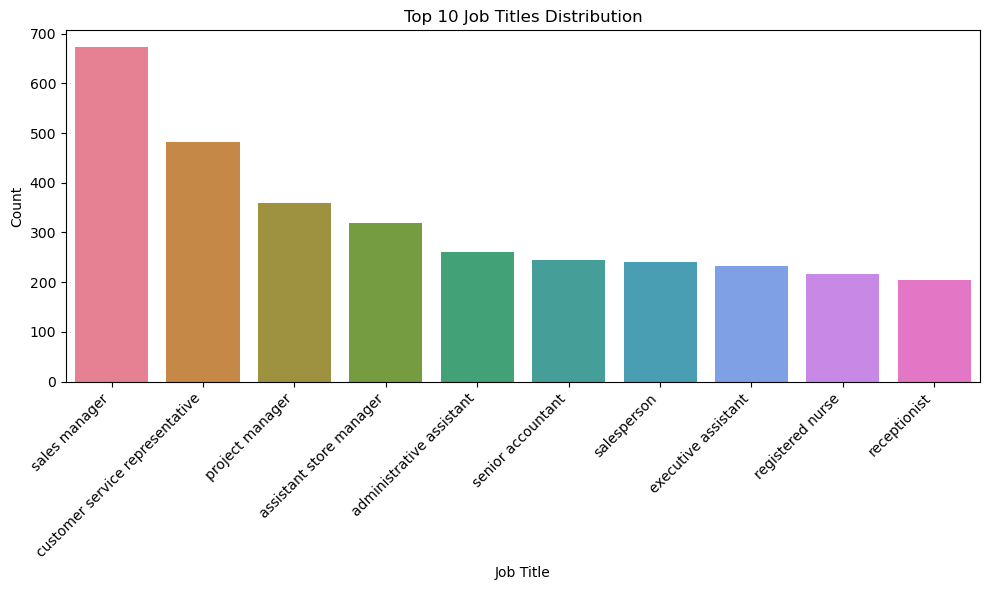

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the color palette
custom_palette = sns.color_palette("husl", 10)  # Example of a custom palette with 10 colors

plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().index[:10], palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

There is significant interest in sales managerial roles, indicating that businesses are actively seeking candidates for these positions. This high demand is reflected in the abundance of job postings for sales managers compared to other roles.

Following sales managerial positions, customer service representatives and project managers are also in demand, though to a lesser extent.



##### 2.Company Distribution

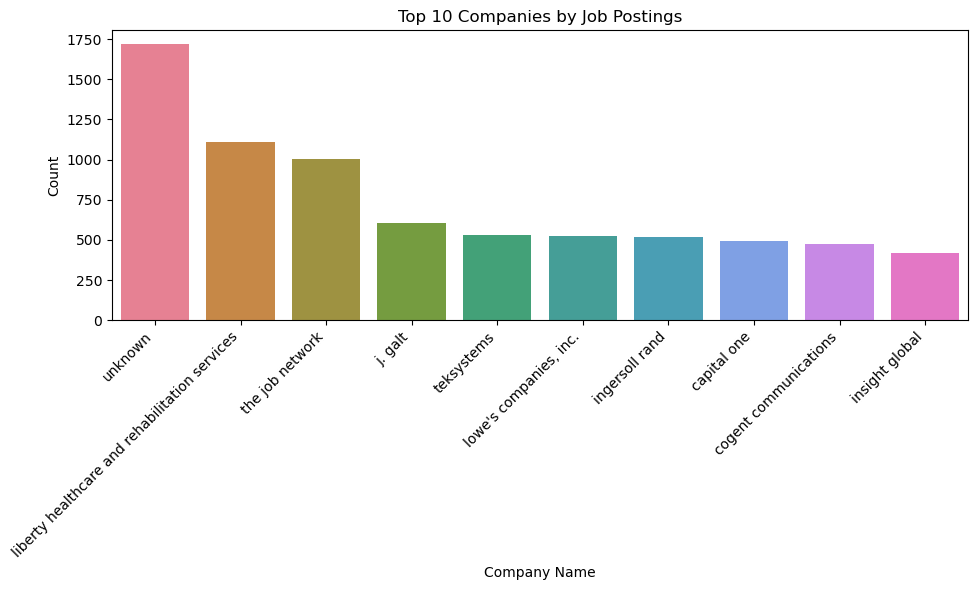

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='company_name', data=df, order=df['company_name'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Top most companies seeking workforce is the Liberty Healthcare and Rehabilitation Services, with more than 2,500 instances.

This translates to a limited skilled workforce and job sekers with skills relating to health and rehabilitation services have a higher probability of landing jobs here.

##### 3.Salary Distribution

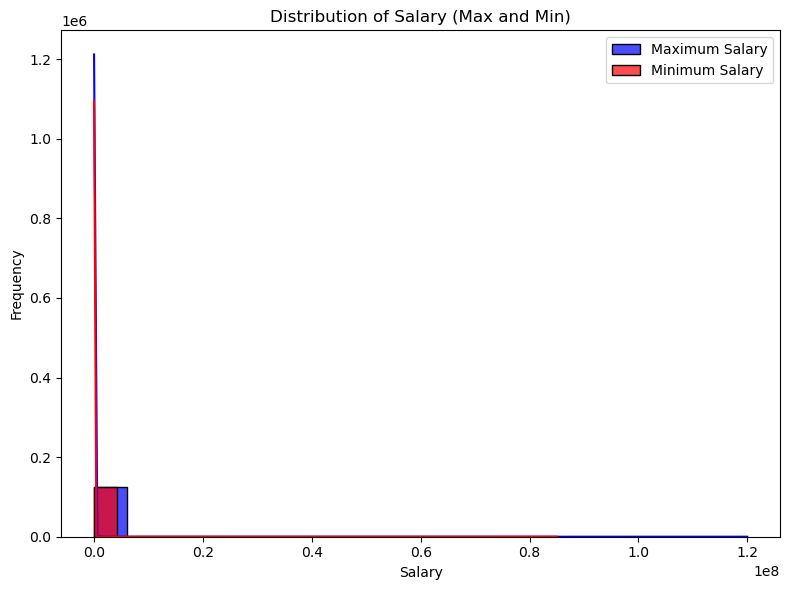

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['max_salary'], bins=20, kde=True, label='Maximum Salary', color='blue', alpha=0.7)
sns.histplot(df['min_salary'], bins=20, kde=True, label='Minimum Salary', color='red', alpha=0.7)
plt.title('Distribution of Salary (Max and Min)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

We proceeded to check the salary distribution that may help job seekers find motivation towards a particular job where most postings posted the minimum salary.

##### 4.Location Distribution

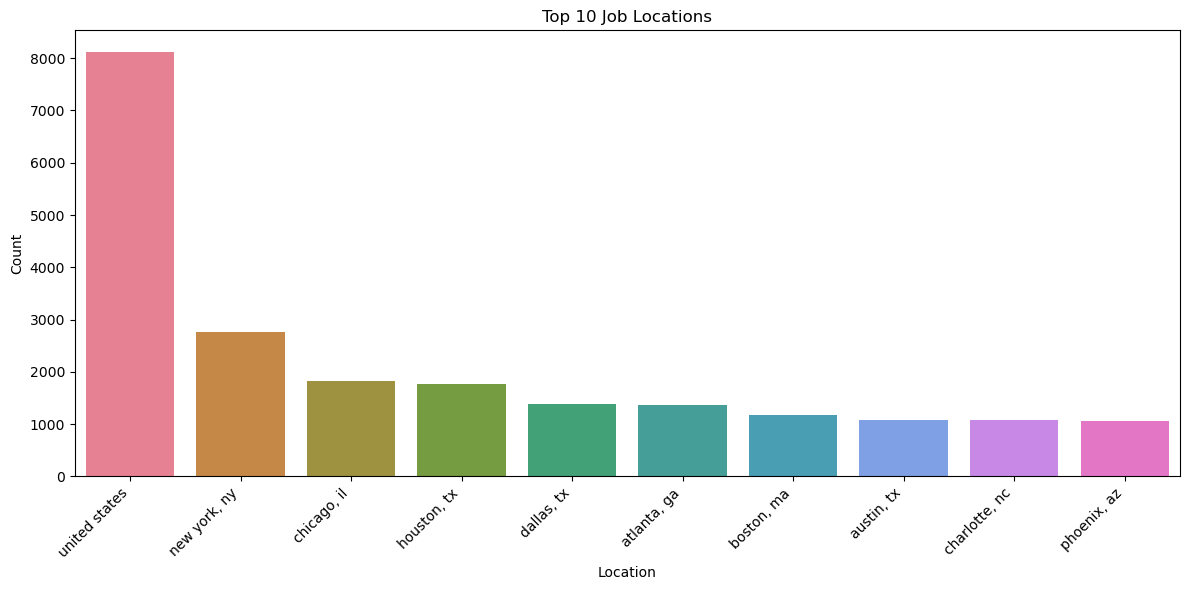

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Majority of the job postings are within the US capital, New York, followed closely by Chicago and Houston.

##### 5.Work_Type Distribution

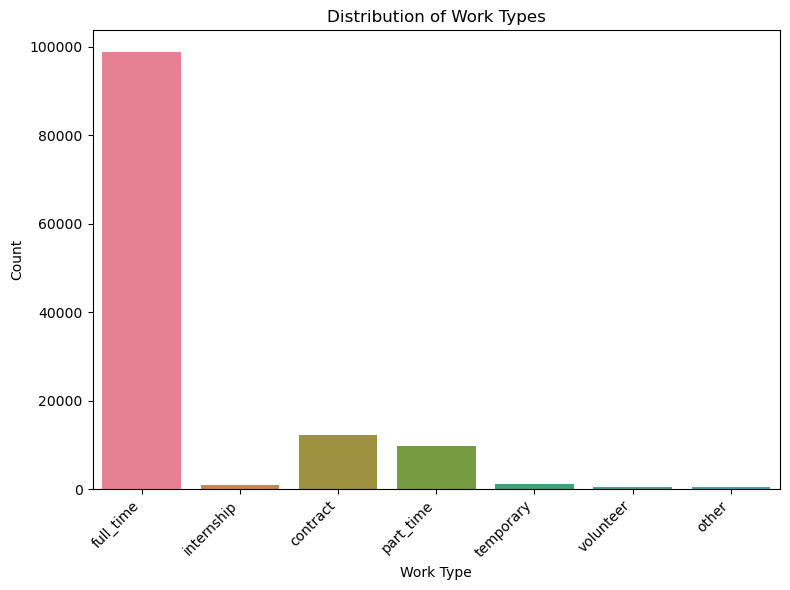

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Most job postings are for full-time positions, reflecting a preference or need for permanent employees rather than contract or part-time workers. This trend indicates a shortage of full-time labor in certain sectors.

There are minimal postings for temporary jobs and internships, suggesting a lower demand or availability for such positions.


##### 6.Experience Level Distribution

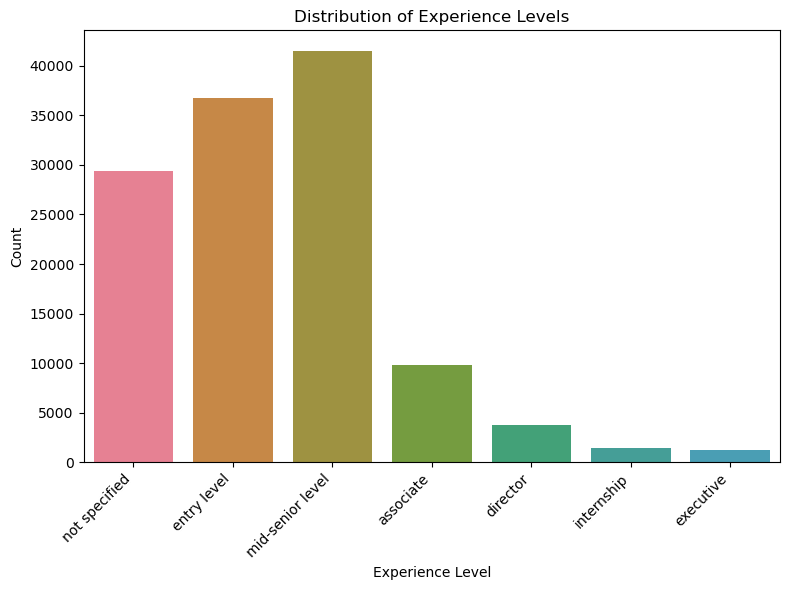

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='formatted_experience_level', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


A significant portion of job postings is targeted at mid-senior level professionals, followed by entry-level positions.

There are fewer postings for internships and executive roles, indicating a focus on experienced professionals and less emphasis on entry-level or high-executive positions.

##### 7.Currency Distribution

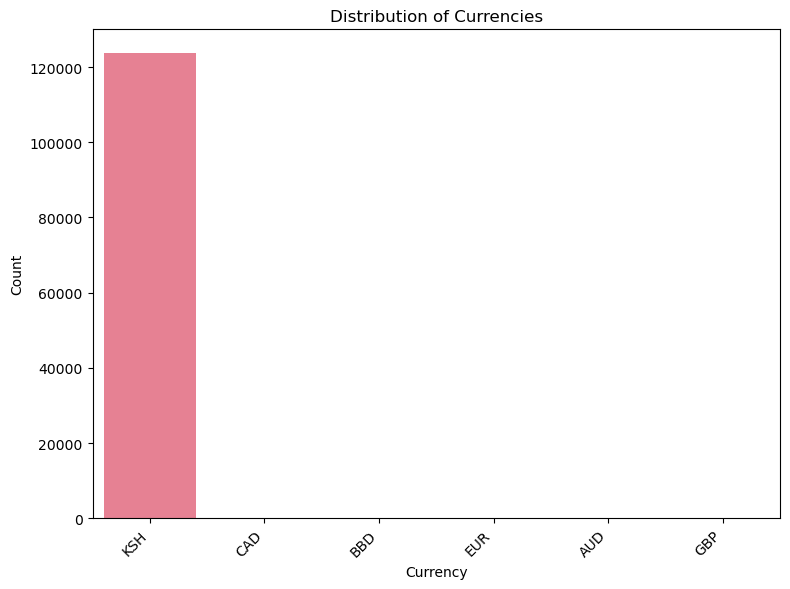

In [ ]:
# Replace 'USD' with 'KSH' in the 'currency' column
df['currency'] = df['currency'].replace('USD', 'KSH')

plt.figure(figsize=(8, 6))
sns.countplot(x='currency', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


All job postings gave a currency description of USD, previously. We however converted this to the Kenya shillings (KSh) to match Kenyan job seekers.

###3.2. Bivariate analysis

##### 1.Top 20 Job Titles with Most Applications

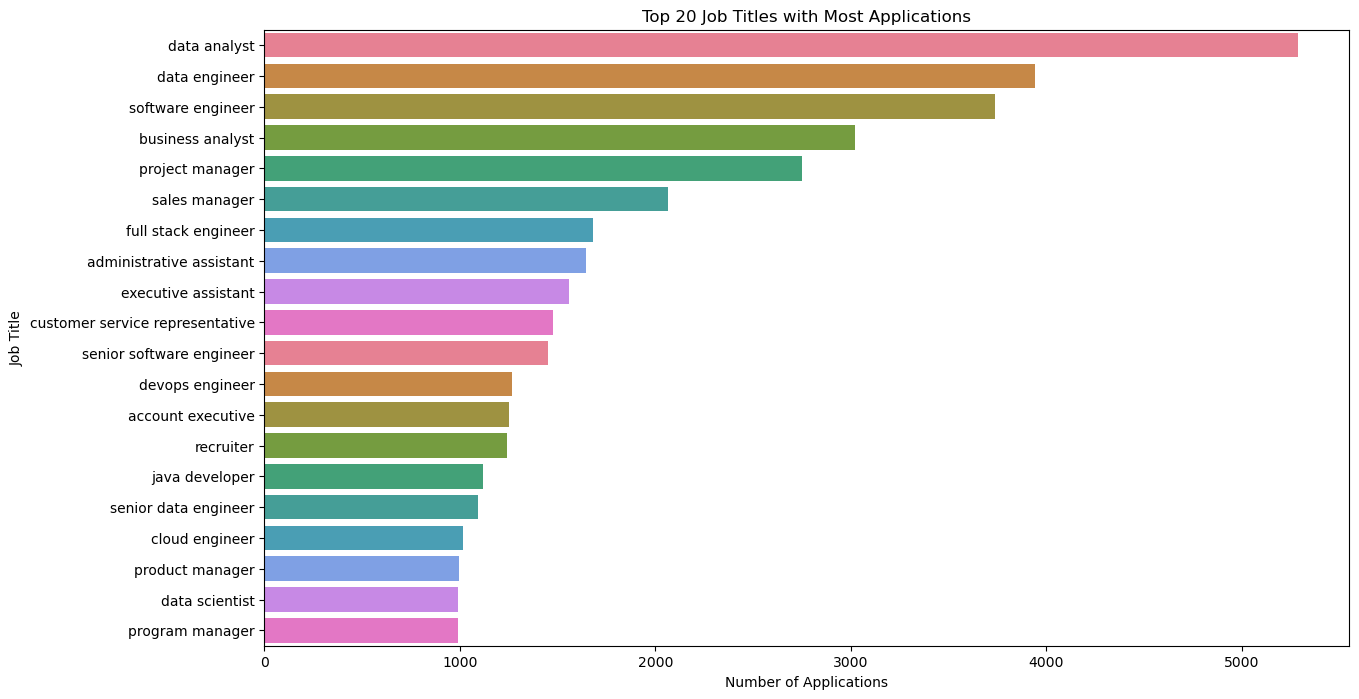

In [ ]:
# Group by 'title' and sum the 'applies' column
title_applications = df.groupby('title')['applies'].sum().reset_index()

# Sort the results in descending order of applications
title_applications_sorted = title_applications.sort_values(by='applies', ascending=False)

# Select the top 10 job titles with the most applications
top_titles = title_applications_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles, x='applies', y='title', palette=custom_palette)
plt.title('Top 20 Job Titles with Most Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Title')
plt.show()


oTech jobs attract a high number of views, suggesting that job seekers with skills in data analysis, engineering, and software development are actively looking for tech roles.

This trend indicates a shift towards tech roles in the job market, possibly driven by increased digital transformation and the growing importance of technology in various industries.


##### 2.Pay Period vs Max_salary

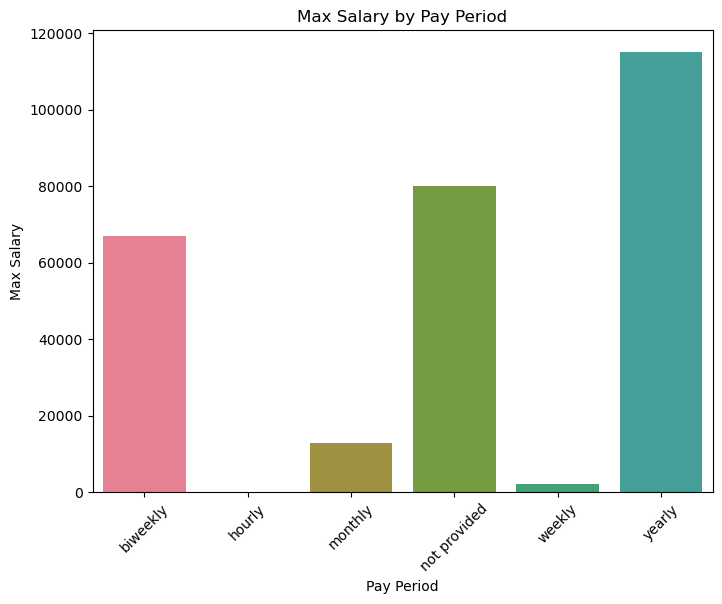

In [ ]:
# Aggregate the data to get the median salary for each pay period
median_salary_by_pay_period = df.groupby('pay_period')['max_salary'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=median_salary_by_pay_period, x='pay_period', y='max_salary', palette=custom_palette)
plt.title('Max Salary by Pay Period')
plt.xlabel('Pay Period')
plt.ylabel('Max Salary')
plt.xticks(rotation=45)
plt.show()


Most job postings define salaries on an annual basis, with fewer postings offering monthly, bi-weekly, weekly, or hourly payments.

This distribution may not cater to job seekers who prefer or require different pay periods.

##### 3.Top 20 Job Titles with Most Views

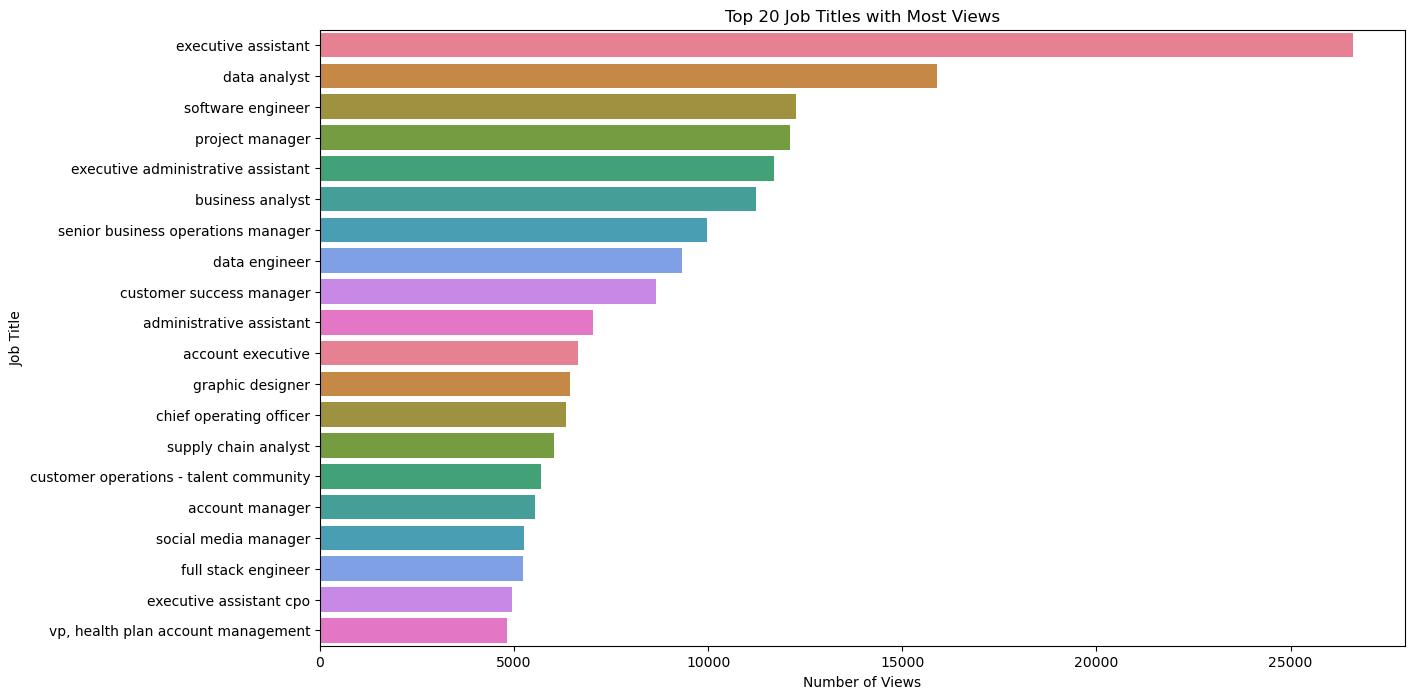

In [ ]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in descending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=False)

# Select the top 10 job titles with the most views
top_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Top 20 Job Titles with Most Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()

Tech jobs attract a high number of views, suggesting that job seekers with skills in data analysis, engineering, and software development are actively looking for tech roles.

This trend indicates a shift towards tech roles in the job market, possibly driven by increased digital transformation and the growing importance of technology in various industries.


##### 4.Bottom 20 Job Titles with Least Views

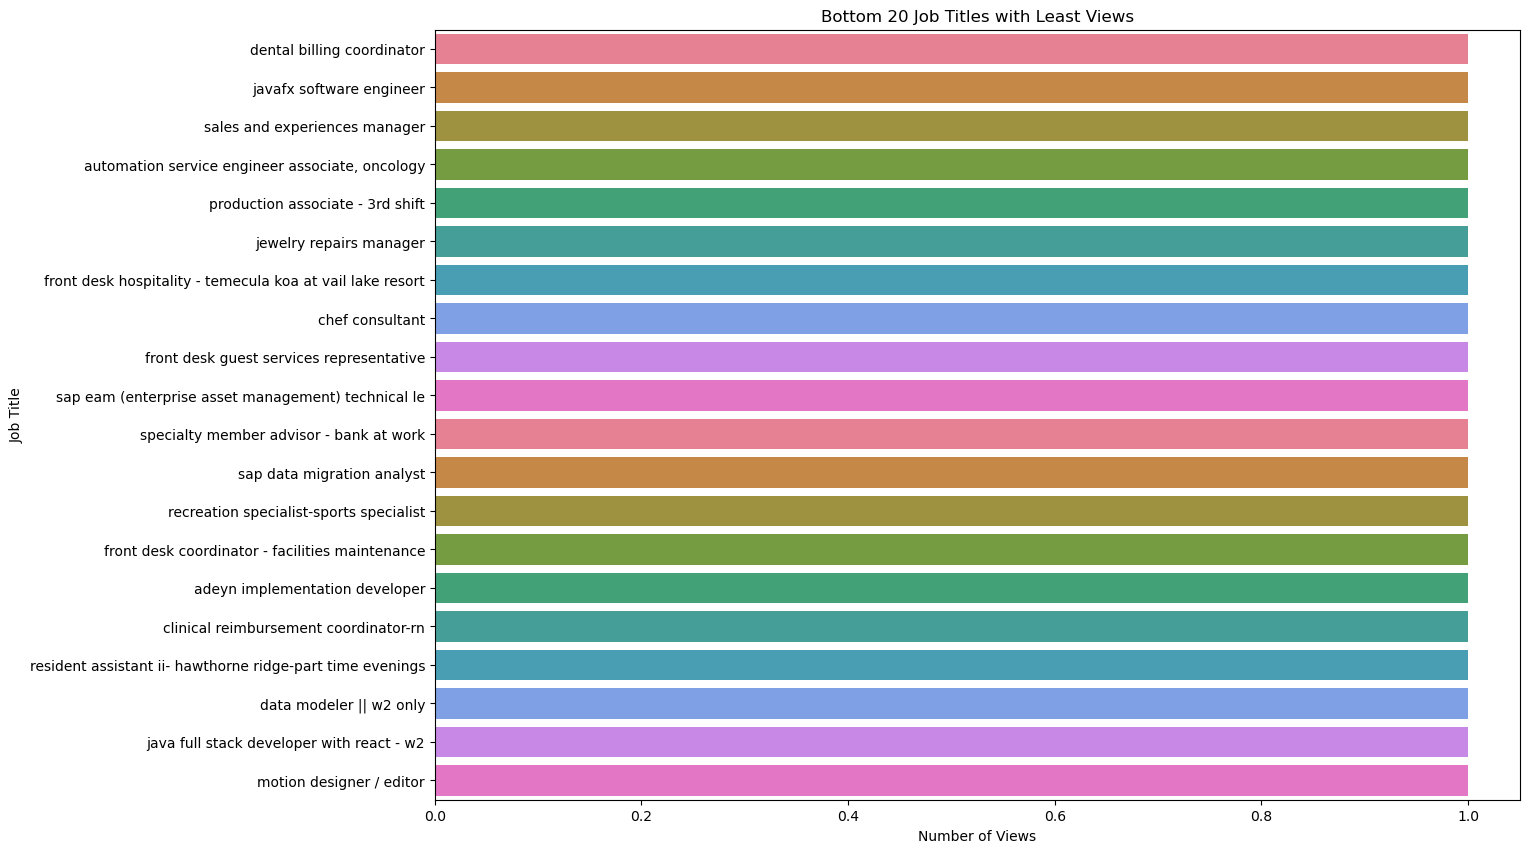

In [ ]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in ascending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=True)

# Select the bottom 20 job titles with the least views
bottom_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 10))
sns.barplot(data=bottom_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Bottom 20 Job Titles with Least Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()


Jobs with fewer views are more likely to be in customer service roles.

This could imply less interest or lower demand for customer service positions compared to other job types.

##### 5.Average Minimum and Maximum Salaries by Experience Level

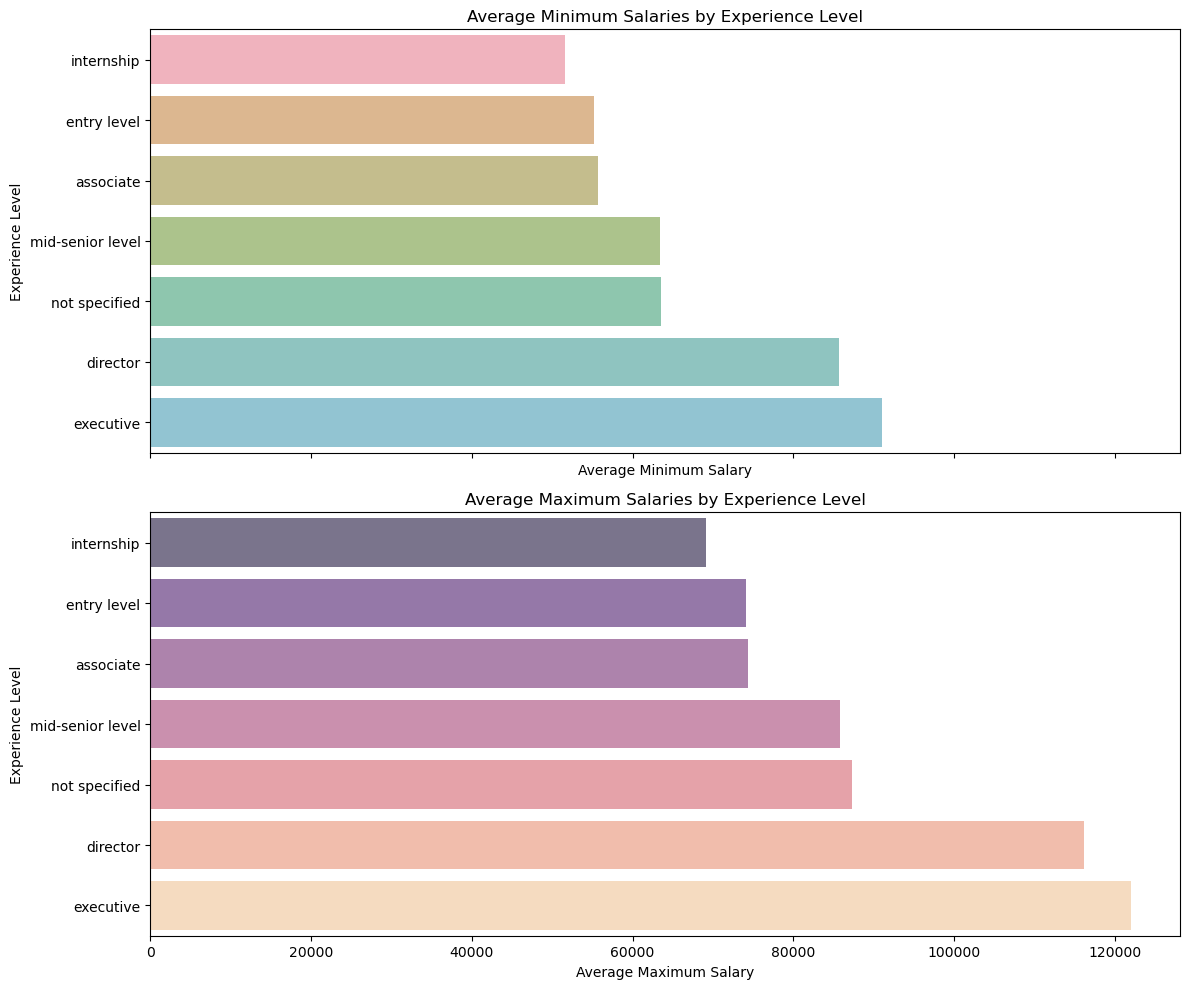

In [ ]:

# Calculate average minimum and maximum salaries by experience level
average_salaries = df.groupby('formatted_experience_level')[['min_salary', 'max_salary']].mean().sort_values(by='min_salary')

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Create a bar plot for minimum salaries
sns.barplot(x=average_salaries['min_salary'], y=average_salaries.index,palette=custom_palette, ax=axs[0], alpha=0.6)
axs[0].set_title('Average Minimum Salaries by Experience Level')
axs[0].set_xlabel('Average Minimum Salary')
axs[0].set_ylabel('Experience Level')

# Create a bar plot for maximum salaries
sns.barplot(x=average_salaries['max_salary'], y=average_salaries.index, palette='magma', ax=axs[1], alpha=0.6)
axs[1].set_title('Average Maximum Salaries by Experience Level')
axs[1].set_xlabel('Average Maximum Salary')
axs[1].set_ylabel('Experience Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

There is a natural progression where higher experience levels are associated with higher salary amounts.

This suggests that experience is a significant factor in determining salary.

##### 6. Max Salary vs Min Salary by Experience level in Top Ten Companies

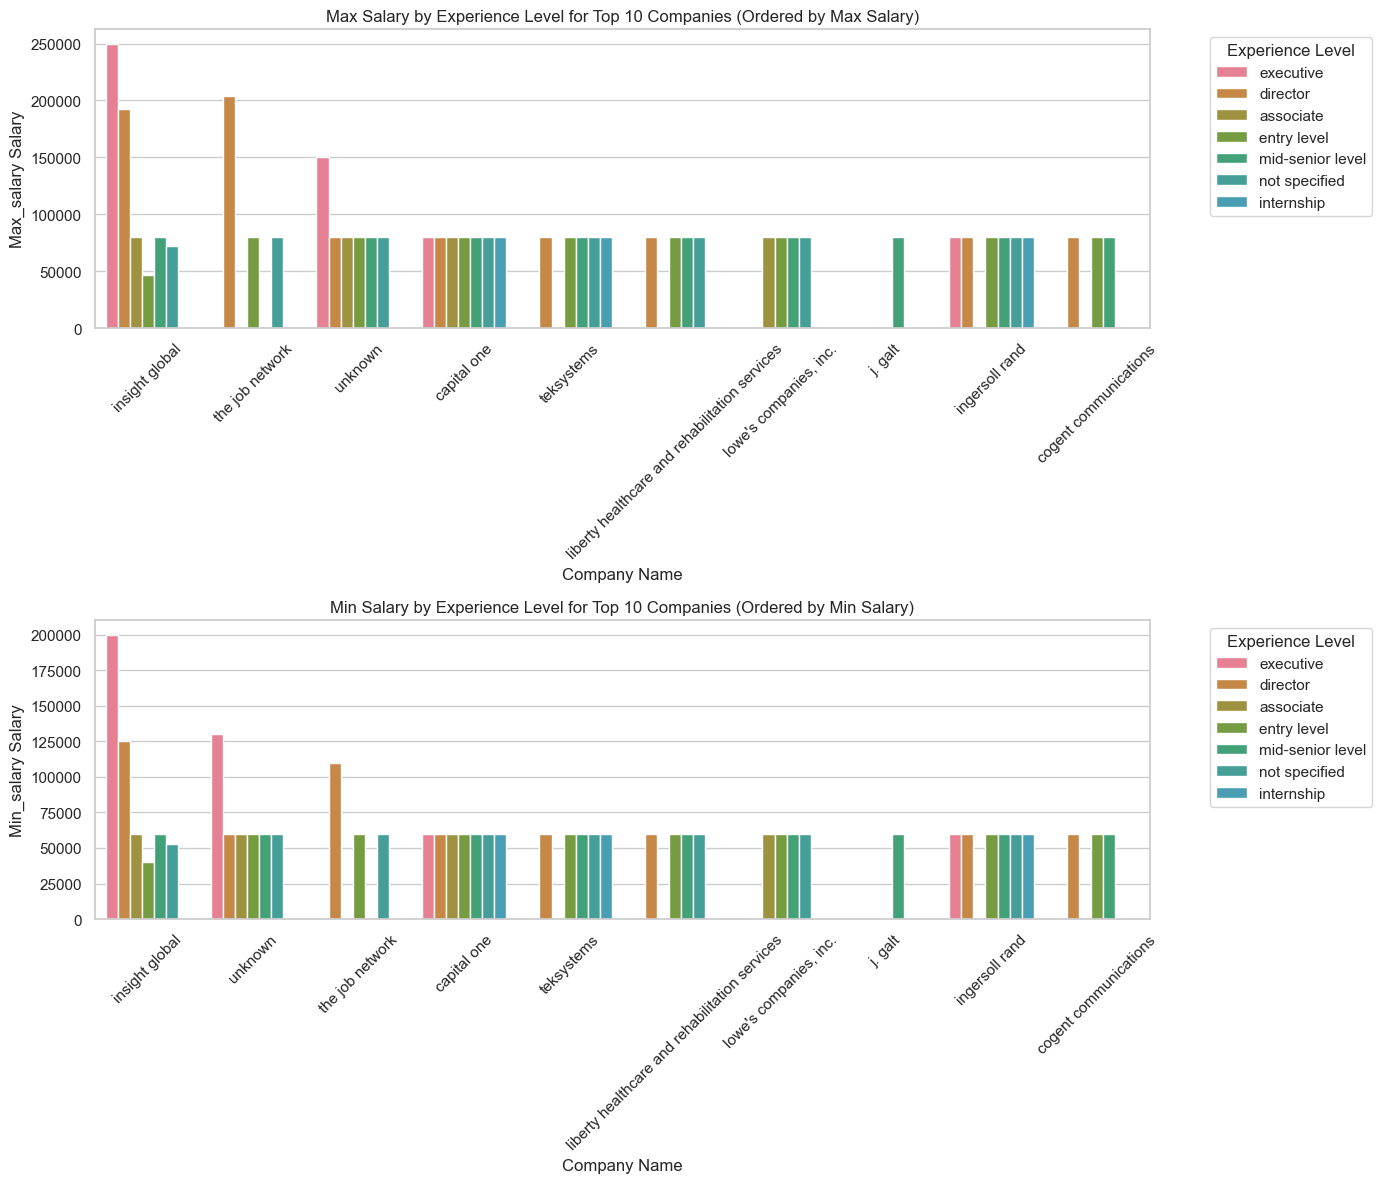

In [ ]:
# Identify the top 10 companies by the number of job postings
top_companies = df['company_name'].value_counts().head(10).index

# Filter the DataFrame to include only these top companies
top_companies_df = df[df['company_name'].isin(top_companies)].copy()

# Ensure salaries are numeric
salary_columns = ['max_salary', 'min_salary']
top_companies_df.loc[:, salary_columns] = top_companies_df.loc[:, salary_columns].apply(pd.to_numeric, errors='coerce')

# Group by company and experience level, then calculate the median salary
grouped_df = top_companies_df.groupby(['company_name', 'formatted_experience_level'])[salary_columns].median().reset_index()

# Sort the DataFrame by max_salary in descending order
grouped_df_max = grouped_df.sort_values(by='max_salary', ascending=False)
# Sort the DataFrame by min_salary in descending order
grouped_df_min = grouped_df.sort_values(by='min_salary', ascending=False)

# Set the visual style of the plots
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(14, 12))

# Function to plot barplots
def plot_salary(df, salary_type, title, position):
    plt.subplot(2, 1, position)
    sns.barplot(data=df, x='company_name', y=salary_type, hue='formatted_experience_level',palette=custom_palette)
    plt.title(title)
    plt.xlabel('Company Name')
    plt.ylabel(salary_type.capitalize() + ' Salary')
    plt.xticks(rotation=45)
    plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot max_salary
plot_salary(grouped_df_max, 'max_salary', 'Max Salary by Experience Level for Top 10 Companies (Ordered by Max Salary)', 1)

# Plot min_salary
plot_salary(grouped_df_min, 'min_salary', 'Min Salary by Experience Level for Top 10 Companies (Ordered by Min Salary)', 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


We observe that top companies with job postings have a maximum salary on the high positions.

The salary amount decreases proportionately with decrease in chronological order of job positions.

##### 7.Location vs Jop posting Metrics

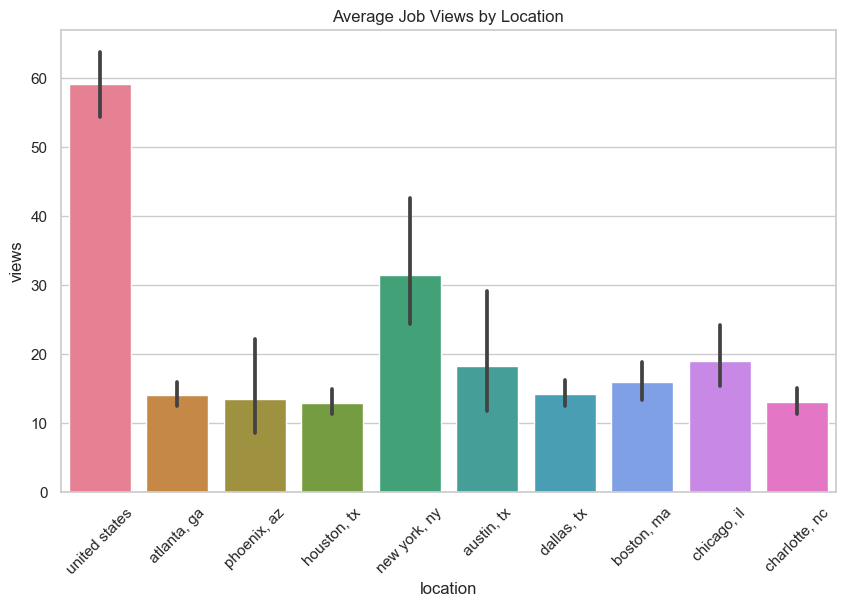

In [ ]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10).index
top_locations_df = df[df['location'].isin(top_locations)]

sns.barplot(data=top_locations_df, x='location', y='views', estimator=np.mean,palette=custom_palette)
plt.title('Average Job Views by Location')
plt.xticks(rotation=45)
plt.show()

Job postings receive more views in the capital city, indicating a higher demand or preference for jobs located in the capital.

This trend could be linked to better availability of social amenities, work proximity, and other benefits in urban areas.

##### 8.Average Max Salary by Work Type

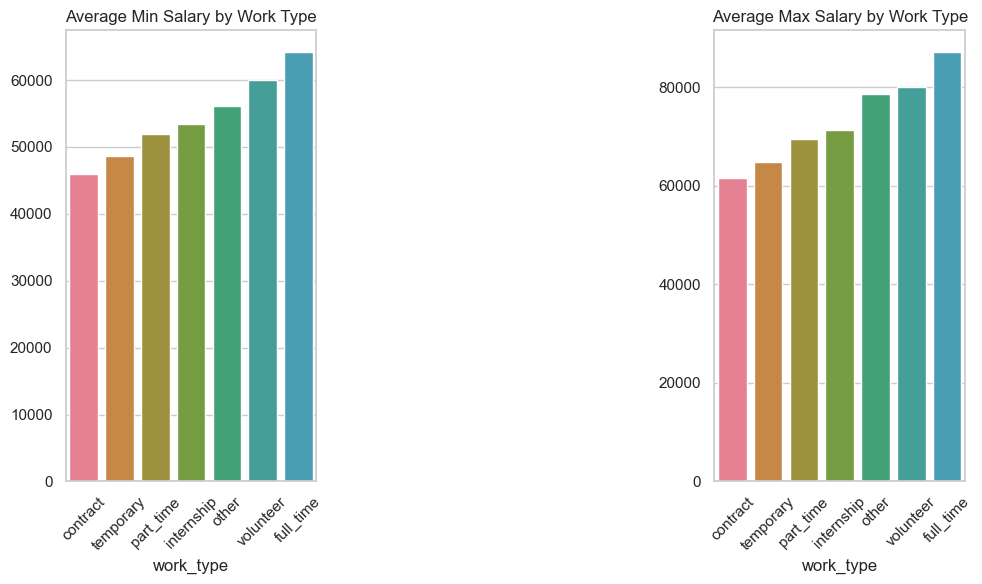

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
summary = df.groupby('work_type')['min_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Min Salary by Work Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
summary = df.groupby('work_type')['max_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Max Salary by Work Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Jobs with higher salaries tend to offer full-time positions, while contract roles generally offer lower salaries.

This suggests that full-time roles are valued more highly or are more financially rewarding.

##### 9.Views vs. Applies

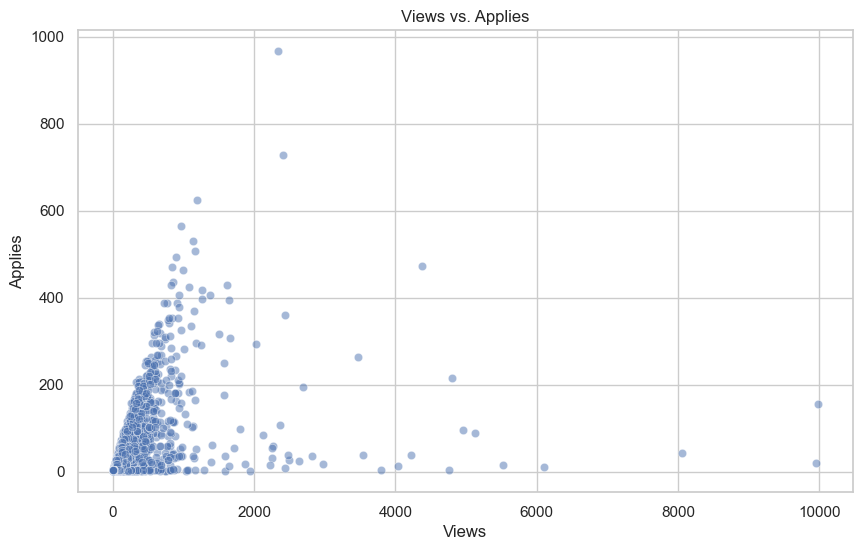

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='applies', alpha=0.5)
plt.title('Views vs. Applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.show()

### Word Clouds

The intention of getting word clouds is to emphasize important phrases and themes in the job listings by visualizing the most prevalent and important words in the job titles/locations while removing less important ones. This can reveal information about the main areas of interest and typical employment roles in the dataset.

##### 10.Word Cloud of Job Titles

In [ ]:
from wordcloud import WordCloud, STOPWORDS
#  additional stopwords for the three wordclouds below:

additional_stopwords = {"part", "time", "specialist", "HR","Hybrid", "Senior","Sr","Bonus", "Contract", "Entry",
                        "Day","perfom", "made","must", "experience","use","knowledge", "apply", "role",
                        "employee", "change","application", "following","position", "requires","ability","skills",
                        "Level", "full" ,"NY" ,"rn" ,"2nd","Remote","Lead","II","United","States","shift"}

stopwords = set(STOPWORDS).union(additional_stopwords)



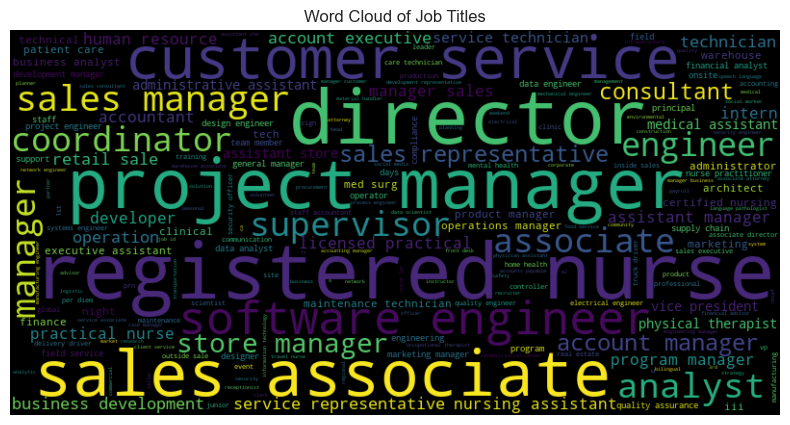

In [ ]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["title"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

##### 11.Word Cloud of Job location

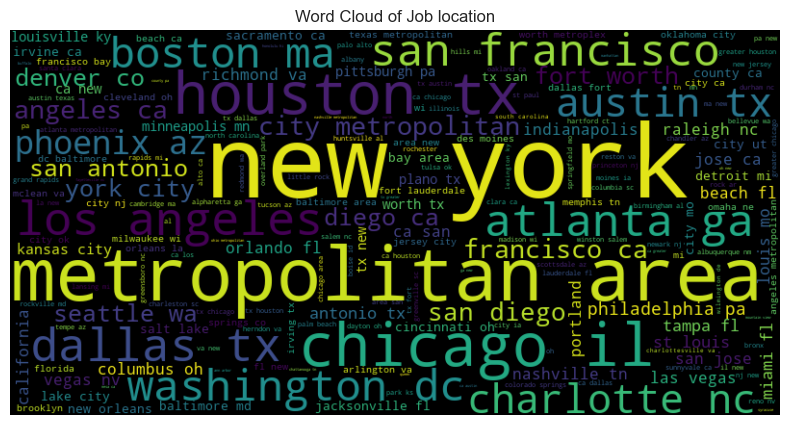

In [ ]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["location"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job location')
plt.show()

In [ ]:
df.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

### Outliers Detection

Outliers detected:
max_salary:
            job_id                      company_name  \
0           921716             corcoran sawyer smith   
1          1829192                           unknown   
2         10998357             the national exemplar   
3         23221523            abrams fensterman, llp   
5         91700727         downtown raleigh alliance   
...            ...                               ...   
123837  3906265414  talentburst, an inc 5000 company   
123839  3906266165                 athena recruiting   
123843  3906266272  talentburst, an inc 5000 company   
123844  3906267117                      lozano smith   
123848  3906267224                         solugenix   

                                                    title  \
0                                   marketing coordinator   
1                       mental health therapist/counselor   
2                             assitant restaurant manager   
3       senior elder law / trusts and estates associ

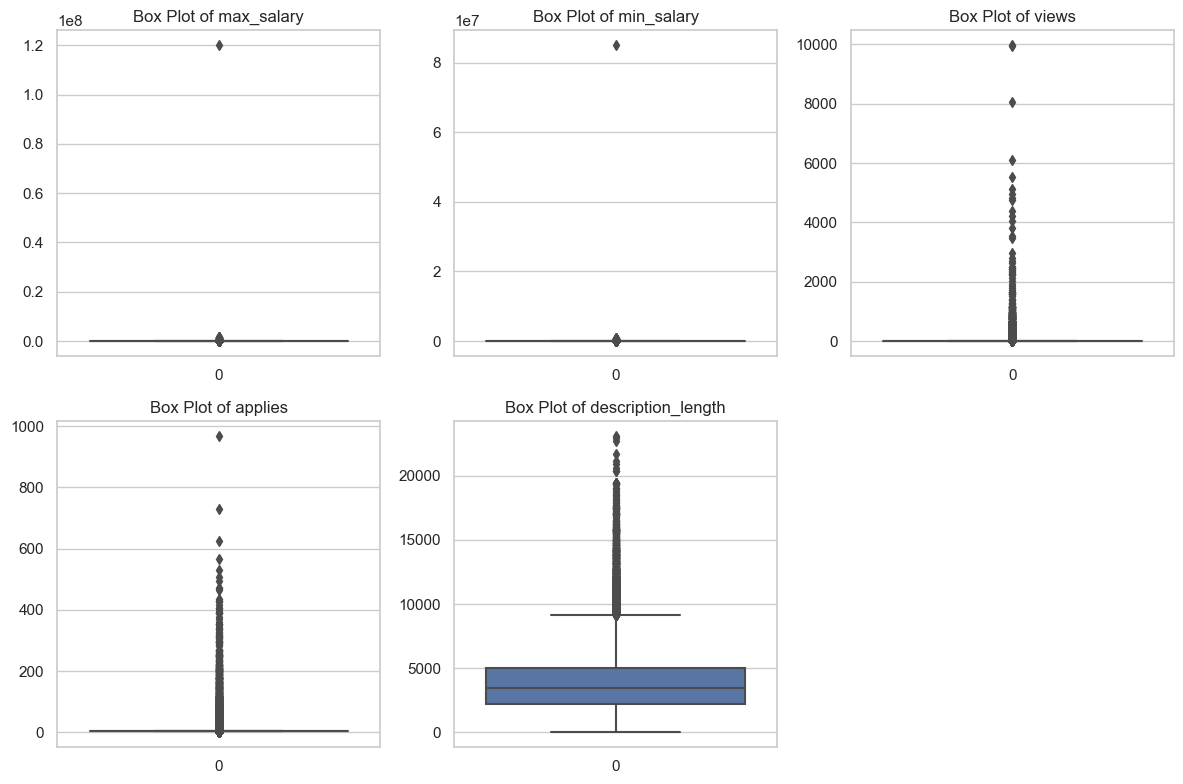

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in numerical columns
numerical_columns = ['max_salary', 'min_salary', 'views', 'applies', 'description_length']
outliers = {}
for col in numerical_columns:
    outliers[col] = detect_outliers_iqr(df, col)

print("Outliers detected:")
for col, outlier_df in outliers.items():
    print(f"{col}:\n{outlier_df}\n")


In [ ]:
# Plotting box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### Correlation Analysis

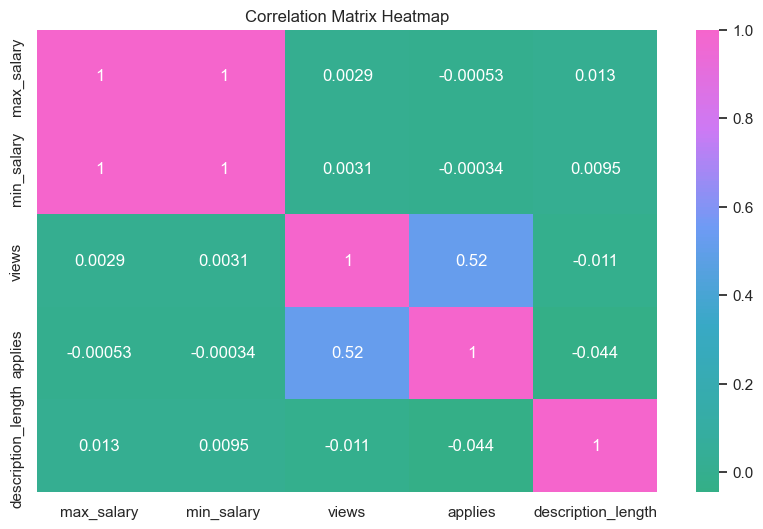

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_palette)

# Compute the correlation matrix
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies', 'description_length']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Pearson Correlation
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='pearson')
print(correlation_matrix)

# Spearman Rank Correlation
spearman_corr = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='spearman')
spearman_corr


            max_salary  min_salary  views  applies
max_salary           1           1      0       -0
min_salary           1           1      0       -0
views                0           0      1        1
applies             -0          -0      1        1


,max_salary,min_salary,views,applies
max_salary,1,1,0,0
min_salary,1,1,0,0
views,0,0,1,0
applies,0,0,0,1


### Correlation Insights:

**max_salary and min_salary:**
These are perfectly correlated (correlation of 1), which is expected since the maximum salary usually relates directly to the minimum salary within the same job category or position.

**views:**
No significant correlation with other features, suggesting that the number of views is independent of salary, job type, or description length.

**applies:**
Similarly, no significant correlation with other features, indicating that the number of applications is independent of salary, job type, or description length.

**description_length:**
Correlated only with itself, suggesting that the length of job descriptions does not have a direct impact on other features like salary or views.


In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

## Feature Engineering
This process helps transform raw data into features that can be used in machine learning models. We did this to identify columns that guide the selection of features for training machine learning models.

In [ ]:
# Engineering the new feature 'average_salary'
df['average_salary'] = (df['max_salary'] + df['min_salary']) / 2

# Dropping the 'min_salary' and 'max_salary' columns
df.drop(columns=['min_salary', 'max_salary'], inplace=True)


In [ ]:
df.shape


(123849, 16)

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'pay_period',
       'location', 'views', 'applies', 'formatted_experience_level',
       'listed_time', 'work_type', 'currency', 'description_length',
       'calculated_expiry_date', 'is_expired', 'average_salary'],
      dtype='object')

In [ ]:
# List of columns to drop
columns_to_drop = [
    'calculated_expiry_date',
    'is_expired',
    'pay_period',#

    ]
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df

,job_id,company_name,title,description,location,views,applies,formatted_experience_level,listed_time,work_type,currency,description_length,average_salary
0,921716,corcoran sawyer smith,marketing coordinator,job descriptiona leading real estate firm in n...,"princeton, nj",20,2,not specified,2024-09-04 15:27:04.559352832,full_time,KSH,2525,18
1,1829192,unknown,mental health therapist/counselor,"at aspen therapy and wellness , we are committ...","fort collins, co",1,3,not specified,2024-08-01 14:49:32.302924544,full_time,KSH,3560,40
2,10998357,the national exemplar,assitant restaurant manager,the national exemplar is accepting application...,"cincinnati, oh",8,3,not specified,2024-07-10 23:26:26.855408128,full_time,KSH,460,"55,000"
3,23221523,"abrams fensterman, llp",senior elder law / trusts and estates associat...,senior associate attorney - elder law / trusts...,"new hyde park, ny",16,3,not specified,2024-08-28 16:27:10.837676544,full_time,KSH,1594,"157,500"
4,35982263,unknown,service technician,looking for hvac service tech with experience ...,"burlington, ia",3,3,not specified,2024-08-13 16:52:13.300526080,full_time,KSH,232,"70,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,lozano smith,title ix/investigations attorney,our walnut creek office is currently seeking a...,"walnut creek, ca",1,3,mid-senior level,2024-08-28 17:58:42.458604288,full_time,KSH,2002,"157,500"
123845,3906267126,pinterest,"staff software engineer, ml serving platform",about pinterest: millions of people across the...,united states,3,3,mid-senior level,2024-07-24 22:43:55.136282880,full_time,KSH,5374,"70,000"
123846,3906267131,eps learning,"account executive, oregon/washington",company overview eps learning is a leading k–1...,"spokane, wa",3,3,mid-senior level,2024-08-15 08:52:31.628588800,full_time,KSH,6415,"70,000"
123847,3906267195,trelleborg applied technologies,business development manager,the business development manager is a 'hunter'...,"texas, united states",4,3,not specified,2024-07-10 12:12:30.703989760,full_time,KSH,3493,"70,000"


In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'location', 'views',
       'applies', 'formatted_experience_level', 'listed_time', 'work_type',
       'currency', 'description_length', 'average_salary'],
      dtype='object')

In [ ]:
df.dtypes

job_id                                object
company_name                          object
title                                 object
description                           object
location                              object
views                                float64
applies                              float64
formatted_experience_level            object
listed_time                   datetime64[ns]
work_type                             object
currency                              object
description_length                     int64
average_salary                       float64
dtype: object

In [ ]:
# Convert 'listed_time' to a numerical feature (e.g., days since listing)
df['listed_time'] = pd.to_datetime(df['listed_time'])
df['days_since_listed'] = (pd.Timestamp.now() - df['listed_time']).dt.days

# Drop the original 'listed_time' column
df = df.drop(columns=['listed_time'])

# Convert object columns to categorical
categorical_columns = ['job_id', 'company_name', 'title', 'description', 'location', 'formatted_experience_level', 'work_type', 'currency']
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert float64 columns to int
# Handle possible missing values before conversion by filling or dropping as appropriate
df['views'] = df['views'].fillna(0).astype(int)
df['applies'] = df['applies'].fillna(0).astype(int)
df['average_salary'] = df['average_salary'].fillna(0).astype(int)

# Check data types after conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
job_id                        category
company_name                  category
title                         category
description                   category
location                      category
views                            int32
applies                          int32
formatted_experience_level    category
work_type                     category
currency                      category
description_length               int64
average_salary                   int32
days_since_listed                int64
dtype: object


### Data Preprocessing
Data preprocessing is a crucial step for preparing the data in a consistent and systematic way, which is essential for building reliable and accurate machine learning models.

It ensures that the numerical features are standardized, which is often required for many machine learning algorithms. It further transforms categorical features into a format that can be used by machine learning models.

This was achieved through scaling the data, onehotencoding and ordinalencoding, then transforming the data.

##### 1.Encode categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['formatted_experience_level', 'work_type', 'currency']

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

##### 2.Standardise Numerical Columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical column
numerical_features = ['views','applies','description_length','average_salary']

# Innitialise standard scaller
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

##### 3.Tokenise Text Columns using NLP

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        tokens = word_tokenize(text.lower())  # Tokenize and lower case
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
        return ' '.join(tokens)
    return text  # Return text as is if it's not a string

# Specify the columns to preprocess
text_columns = ['company_name', 'title', 'location', 'description']

# Apply preprocessing to the specified columns
for column in text_columns:
        df[f'processed_{column}'] = df[column].apply(preprocess_text)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Caro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


This approach helps ensure that the dataset is ready for binary classification tasks, allowing us to analyze and model the likelihood of job postings receiving high or low numbers of applications.

From the above, so far, we see that there is a likelihood of getting low numbers of applications.

All the values in 'high_application_likelihood' are 0, indicating that these job postings have a low application likelihood (below the median threshold).

There are 113,763 instances with a high_application_likelihood of 0 (low application likelihood). There are 10,086 instances with a high_application_likelihood of 1 (high application likelihood). This shows that the majority of the job postings have a low application likelihood, while a smaller subset has a high application likelihood.

The code confirms that both classes (0 and 1) are present in the high_application_likelihood target variable, which is important for training a binary classification model.

 ### Principal Component Analysis(PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Print column names for debugging
print("DataFrame columns:", df.columns.tolist())

# Define categorical and numerical columns (ensure these exist in df)
categorical_columns = ['formatted_experience_level', 'pay_period', 'work_type']
numerical_columns = ['average_salary','views','applies','description_length',]

# Verify that all columns exist in df
numerical_columns = [col for col in numerical_columns if col in df.columns]
categorical_columns = [col for col in categorical_columns if col in df.columns]

print("Verified numerical columns:", numerical_columns)
print("Verified categorical columns:", categorical_columns)

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat_nom', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         [col for col in categorical_columns if col in ['company_name', 'location', 'currency', 'work_type']]),  # Nominal categorical features
        ('cat_ord', OrdinalEncoder(),
         [col for col in categorical_columns if col in ['formatted_experience_level', 'pay_period']])  # Ordinal categorical features
    ])


DataFrame columns: ['job_id', 'company_name', 'title', 'description', 'location', 'views', 'applies', 'formatted_experience_level', 'work_type', 'currency', 'description_length', 'average_salary', 'days_since_listed', 'processed_company_name', 'processed_title', 'processed_location', 'processed_description']
Verified numerical columns: ['average_salary', 'views', 'applies', 'description_length']
Verified categorical columns: ['formatted_experience_level', 'work_type']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Create a pipeline with preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Retain 95% of variance
])

# Fit and transform the data
pca_transformed_data = pipeline.fit_transform(df)

# Get the number of components
num_components = pipeline.named_steps['pca'].n_components_

# Create DataFrame from the transformed data
df_pca = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(num_components)])

# Display the updated DataFrame
print("PCA-transformed DataFrame:")
print(df_pca.head())

PCA-transformed DataFrame:
   PC1  PC2  PC3  PC4  PC5
0    2   -0   -1    0   -0
1    2   -0   -0   -0    0
2    2   -0   -1    1   -0
3    2   -0   -1    1   -0
4    2   -0   -1    1   -0


In [ ]:
# Extract the PCA component from the pipeline
df_pca= pipeline.named_steps['pca']

# Explained variance by each principal component
explained_variance = df_pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print explained variance
print("Explained variance by each component:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_explained_variance)

Explained variance by each component:
 [0.47832477 0.18272502 0.12231278 0.11891283 0.0577925 ]
Cumulative explained variance:
 [0.47832477 0.66104979 0.78336258 0.90227541 0.96006791]


Cumulative Variance: By using the first five principal components,it explain 96.01% of the variance in the data.

This means we can reduce the dimensionality of our data from its original number of features to five principal components without losing much information.

 ##### Distribution of data in the reduced dimensions through Principal Component Analysis (PCA).

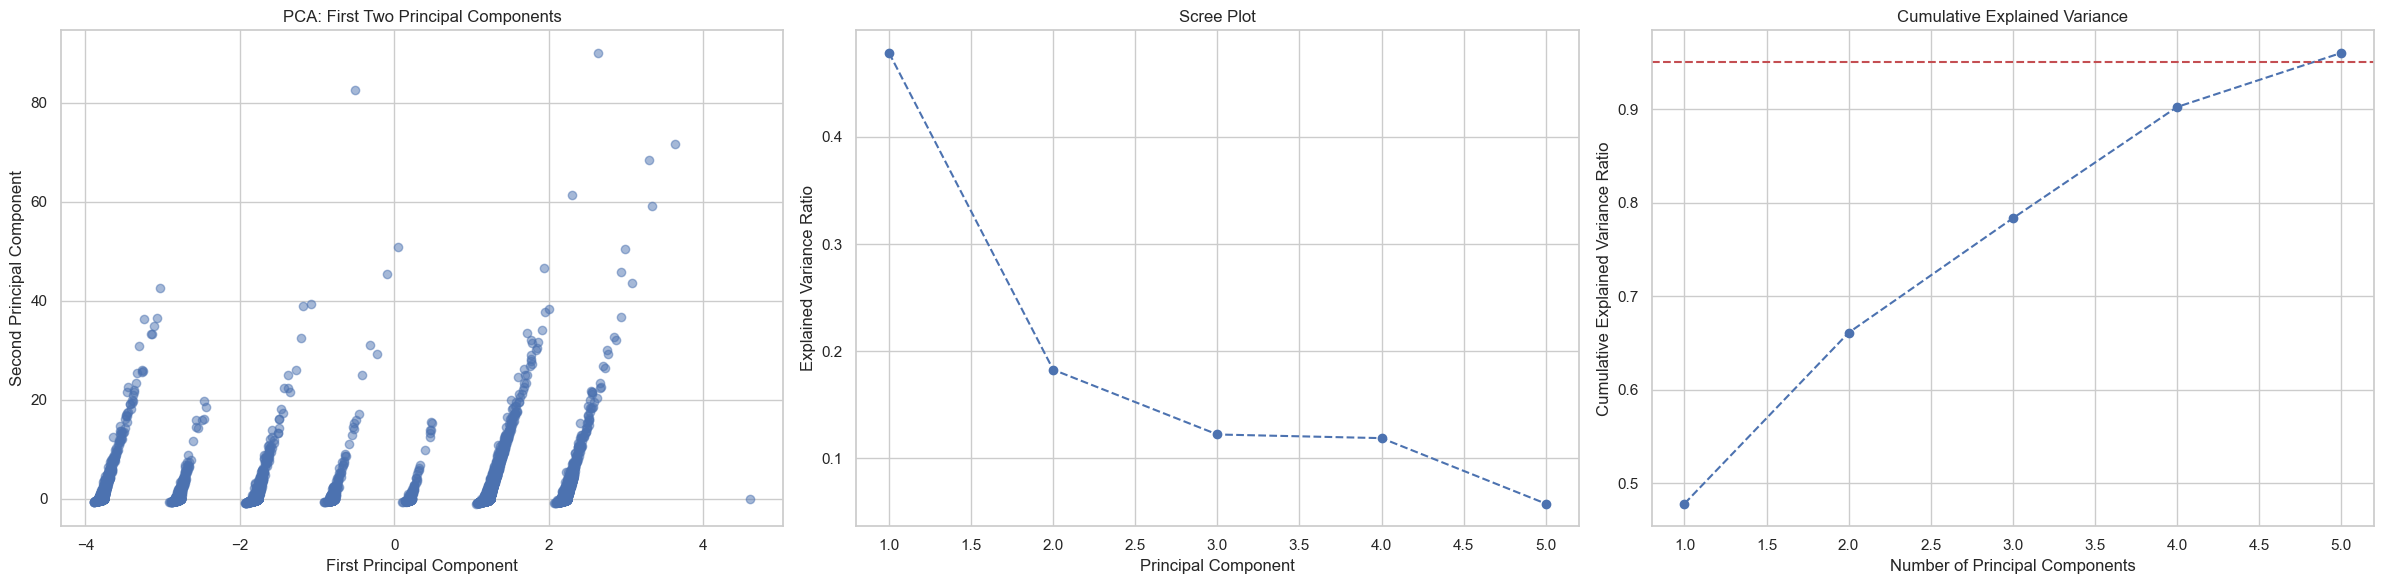

In [ ]:
# Create a figure with three subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Scatter plot of the first two principal components (moved to the first position)
sc = axs[0].scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], alpha=0.5)
axs[0].set_title('PCA: First Two Principal Components')
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].grid(True)

# Scree plot (moved to the second position)
axs[1].plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
axs[1].set_title('Scree Plot')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Explained Variance Ratio')
axs[1].grid(True)

# Cumulative explained variance plot (moved to the third position)
axs[2].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
axs[2].set_title('Cumulative Explained Variance')
axs[2].set_xlabel('Number of Principal Components')
axs[2].set_ylabel('Cumulative Explained Variance Ratio')
axs[2].grid(True)
axs[2].axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance

# Show the plots
plt.tight_layout()
plt.show()

These plots help in understanding the distribution of data in the reduced dimensions and the amount of variance captured by the principal components.

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'location', 'views',
       'applies', 'formatted_experience_level', 'work_type', 'currency',
       'description_length', 'average_salary', 'days_since_listed',
       'processed_company_name', 'processed_title', 'processed_location',
       'processed_description'],
      dtype='object')

### Feature Selection

##### 1.Predictor Dataframe

In [ ]:
# Create a copy of the DataFrame for prediction
predictor_df = df[['views', 'description_length', 'average_salary', 'formatted_experience_level',
                   'days_since_listed', 'work_type']].copy()

# Create the target variable 'high_applications'
median_applies = df['applies'].median()  # Calculate the median of 'applies'
predictor_df['application_likelihood'] = (df['applies'] > median_applies).astype(int)  # Assign to the copy

# Display the predictor DataFrame
predictor_df.head()

,views,description_length,average_salary,formatted_experience_level,days_since_listed,work_type,application_likelihood
0,0,-1,-0,6,-2,1,0
1,-0,-0,-0,6,-11,1,0
2,-0,-2,-0,6,16,1,0
3,0,-1,0,6,-17,1,0
4,-0,-2,-0,6,0,1,0


##### 2.Recommender Dataframe

In [ ]:
# Features
recommender_df = df[['job_id','processed_title', 'processed_description', 'processed_location', 'views','applies',
                     'processed_company_name','work_type', 'average_salary']]

# Display the recommender DataFrame
recommender_df.head()

,job_id,processed_title,processed_description,processed_location,views,applies,processed_company_name,work_type,average_salary
0,921716,marketing coordinator,job descriptiona leading real estate firm new ...,princeton nj,0,-0,corcoran sawyer smith,1,-0
1,1829192,mental health,aspen therapy wellness committed serving clien...,fort collins co,-0,-0,unknown,1,-0
2,10998357,assitant restaurant manager,national exemplar accepting application assist...,cincinnati oh,-0,-0,national exemplar,1,-0
3,23221523,senior elder law trust estate associate attorney,senior associate attorney elder law trust esta...,new hyde park ny,0,-0,abrams fensterman llp,1,0
4,35982263,service technician,looking hvac service tech experience commerica...,burlington ia,-0,-0,unknown,1,-0


### 4.MODELLING

### 1.Predictor Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report


#### Class Imbalance

In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Separate majority and minority classes
df_majority = predictor_df[predictor_df['application_likelihood'] == 0]
df_minority = predictor_df[predictor_df['application_likelihood'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority and upsampled minority classes
predictor_df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Define feature columns and target
X_balanced = predictor_df_balanced[['views', 'description_length', 'average_salary', 'formatted_experience_level', 'days_since_listed', 'work_type']]
y_balanced = predictor_df_balanced['application_likelihood']

# Standardize features
scaler = StandardScaler()
X_balanced = scaler.fit_transform(X_balanced)


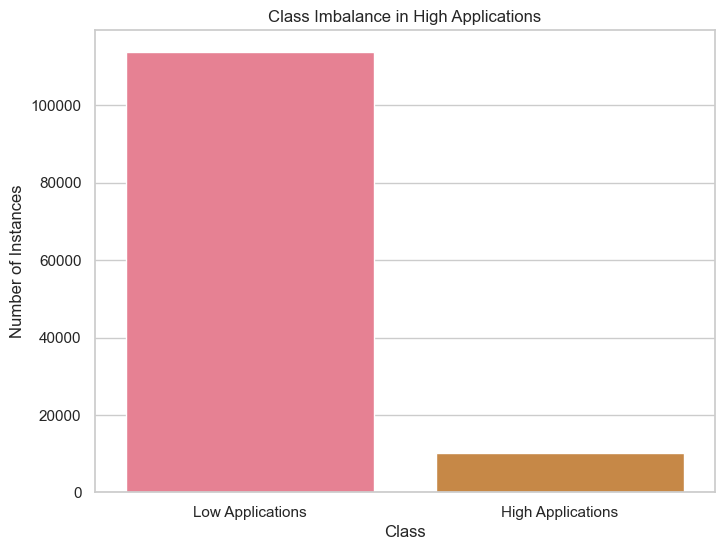

In [ ]:
# Check distribution of the target variable
class_counts = predictor_df['application_likelihood'].value_counts()

# Create a bar plot to visualize class imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=custom_palette)
plt.title('Class Imbalance in High Applications')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Low Applications', 'High Applications'])
plt.show()

About 8.14% (10,086 out of 123,849) of the job postings received a high number of applications, while the remaining 91.86% (113,763 out of 123,849) did not.

This indicates an imbalance in the dataset, with significantly more job postings having low application numbers compared to high application numbers.

#### Handle Class Imbalance

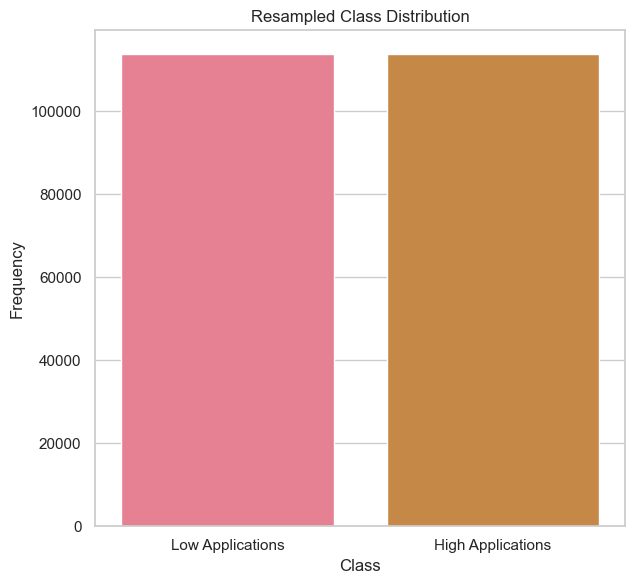

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_balanced, y_balanced)

# Calculate resampled class distribution
resampled_class_distribution = pd.Series(y_resampled).value_counts()

# Plot resampled class distribution
plt.figure(figsize=(12, 6))

# Plot the resampled class distribution
plt.subplot(1, 2, 2)
sns.barplot(x=resampled_class_distribution.index, y=resampled_class_distribution.values,palette=custom_palette)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Low Applications', 'High Applications'])

plt.tight_layout()
plt.show()


After applying SMOTE, the dataset now has an equal number of instances for both 'Low Applications' and 'High Applications', effectively addressing the class imbalance issue present in the original dataset

#### Split the data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = predictor_df[['views', 'description_length', 'average_salary', 'formatted_experience_level',
                  'days_since_listed', 'work_type']]
y = predictor_df['high_applications']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_df, y, test_size=0.3, random_state=42)

# Verify the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (86694, 7)
X_test shape: (37155, 7)
y_train shape: (86694,)
y_test shape: (37155,)


The training set contains 86,694 samples, which is about 70% of the total dataset, and the testing set contains 37,155 samples, which is about 30% of the total dataset.

This indicates that the dataset is properly split into training and testing subsets, with the training set used to fit the model and the testing set used to evaluate its performance.

#### Standardize the features
This is to standardize the features in the training and testing datasets

In [ ]:
# Standardize the features (optional, but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Load libraries for modelling

In [ ]:
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Define cross validation function
def perform_cross_validation(model, X, y, cv=5):
    stratified_cv = StratifiedKFold(n_splits=cv)
    cv_scores = cross_val_score(model, X, y, cv=stratified_cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")
    return cv_scores

# Define the learning curve plotting function
def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve - {model_name}')
    ax.legend(loc='best')

### 1.1. Baseline Model: LogisticRegression

Model: Logistic Regression
Cross-Validation Accuracy: 0.9413693456352755 (+/- 0.007185616685778505)
Test Accuracy: 0.9419407012824907
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    113763
           1       0.96      0.93      0.94    113763

    accuracy                           0.94    227526
   macro avg       0.94      0.94      0.94    227526
weighted avg       0.94      0.94      0.94    227526

ROC-AUC Score: 0.9879039464507267


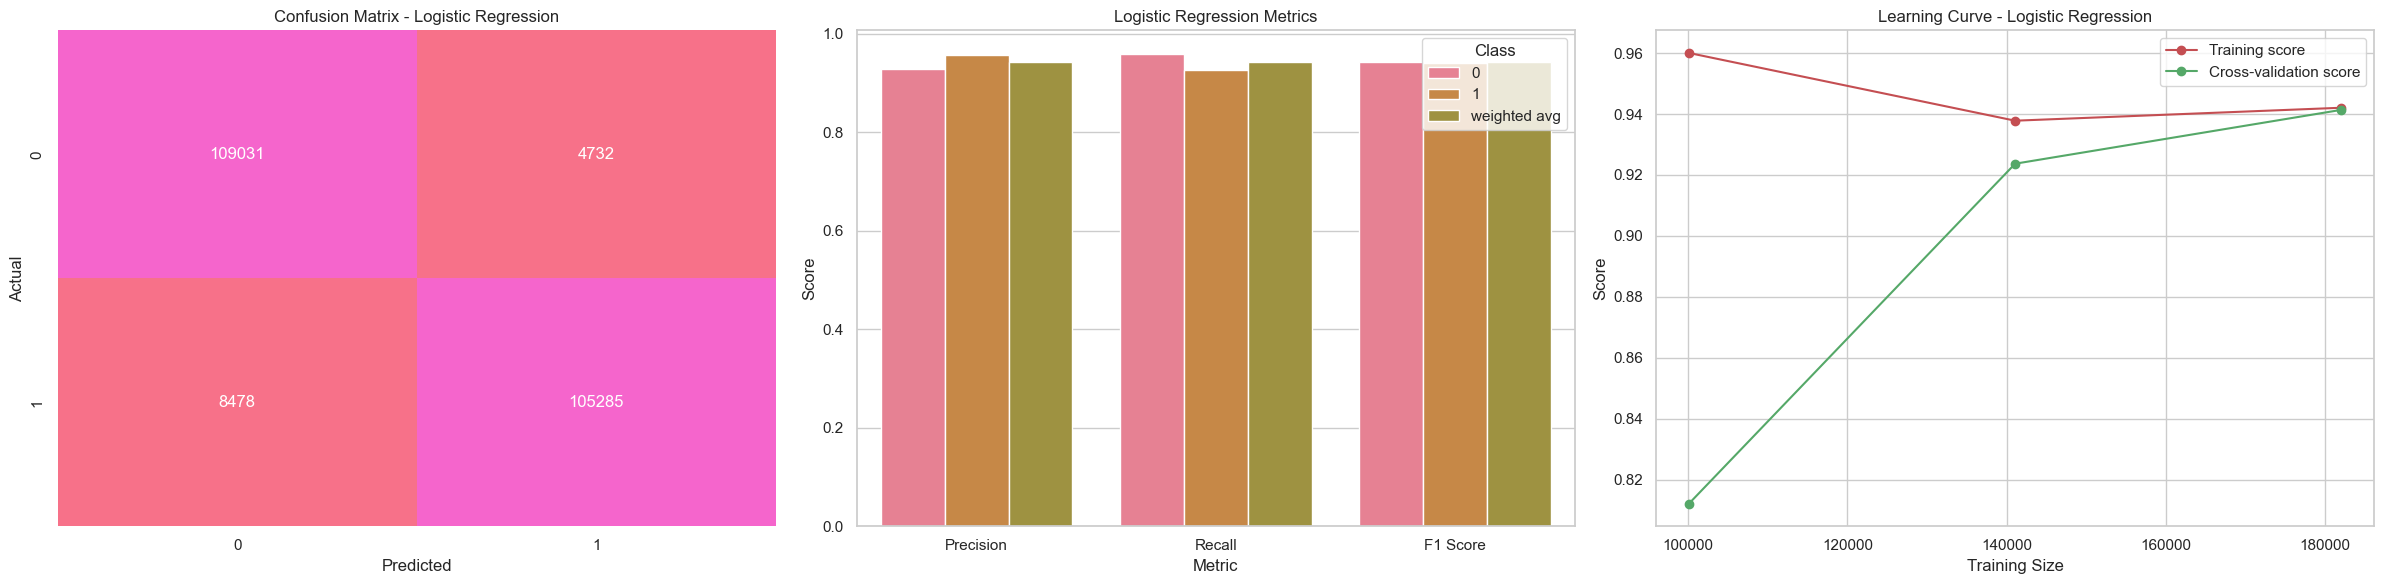

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the custom color palette
custom_palette = sns.color_palette("husl", 10)

# Initialize the model
logistic_model = LogisticRegression(random_state=42)

# Perform cross-validation
print("Model: Logistic Regression")
cv_results_logistic = perform_cross_validation(logistic_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
logistic_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_logistic = logistic_model.predict(X_balanced)

# Evaluate the model
accuracy_logistic = accuracy_score(y_balanced, y_pred_logistic)
classification_rep_logistic = classification_report(y_balanced, y_pred_logistic, output_dict=True)
roc_auc_logistic = roc_auc_score(y_balanced, logistic_model.predict_proba(X_balanced)[:, 1])
conf_matrix_logistic = confusion_matrix(y_balanced, y_pred_logistic)

print(f"Test Accuracy: {accuracy_logistic}")
print(f"Classification Report:\n{classification_report(y_balanced, y_pred_logistic)}")
print(f"ROC-AUC Score: {roc_auc_logistic}")

# Convert the classification report to a DataFrame
metrics_df = pd.DataFrame(classification_rep_logistic).transpose()

# Filter out the rows we need (precision, recall, f1-score)
metrics_filtered = metrics_df.loc[['0', '1', 'weighted avg'], ['precision', 'recall', 'f1-score']]
metrics_filtered.columns = ['Precision', 'Recall', 'F1 Score']
metrics_filtered = metrics_filtered.reset_index().rename(columns={'index': 'Class'})

# Plot the confusion matrix, metrics, and learning curve side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap=custom_palette, cbar=False, ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix - Logistic Regression')

# Plot metrics
metrics_melted = metrics_filtered.melt(id_vars='Class', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted, palette=custom_palette, ax=axs[1])
axs[1].set_title('Logistic Regression Metrics')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('Score')
axs[1].legend(title='Class')

# Plot learning curve
plot_learning_curve(logistic_model, X_balanced, y_balanced, "Logistic Regression", axs[2])

plt.tight_layout()
plt.show()


F1-Score :Both classes: 0.94 ROC-AUC Score: 0.9879

Precision: Class 0: 0.93 Class 1: 0.96

Recall: Class 0: 0.96 Class 1: 0.93

The logistic regression model is highly accurate and reliable in predicting the target variable

### 1.2. RandomForestClassifier

Model: Random Forest
Cross-Validation Accuracy: 0.9859268921206071 (+/- 0.0070663806208358226)
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113763
           1       1.00      1.00      1.00    113763

    accuracy                           1.00    227526
   macro avg       1.00      1.00      1.00    227526
weighted avg       1.00      1.00      1.00    227526

ROC-AUC Score: 1.0


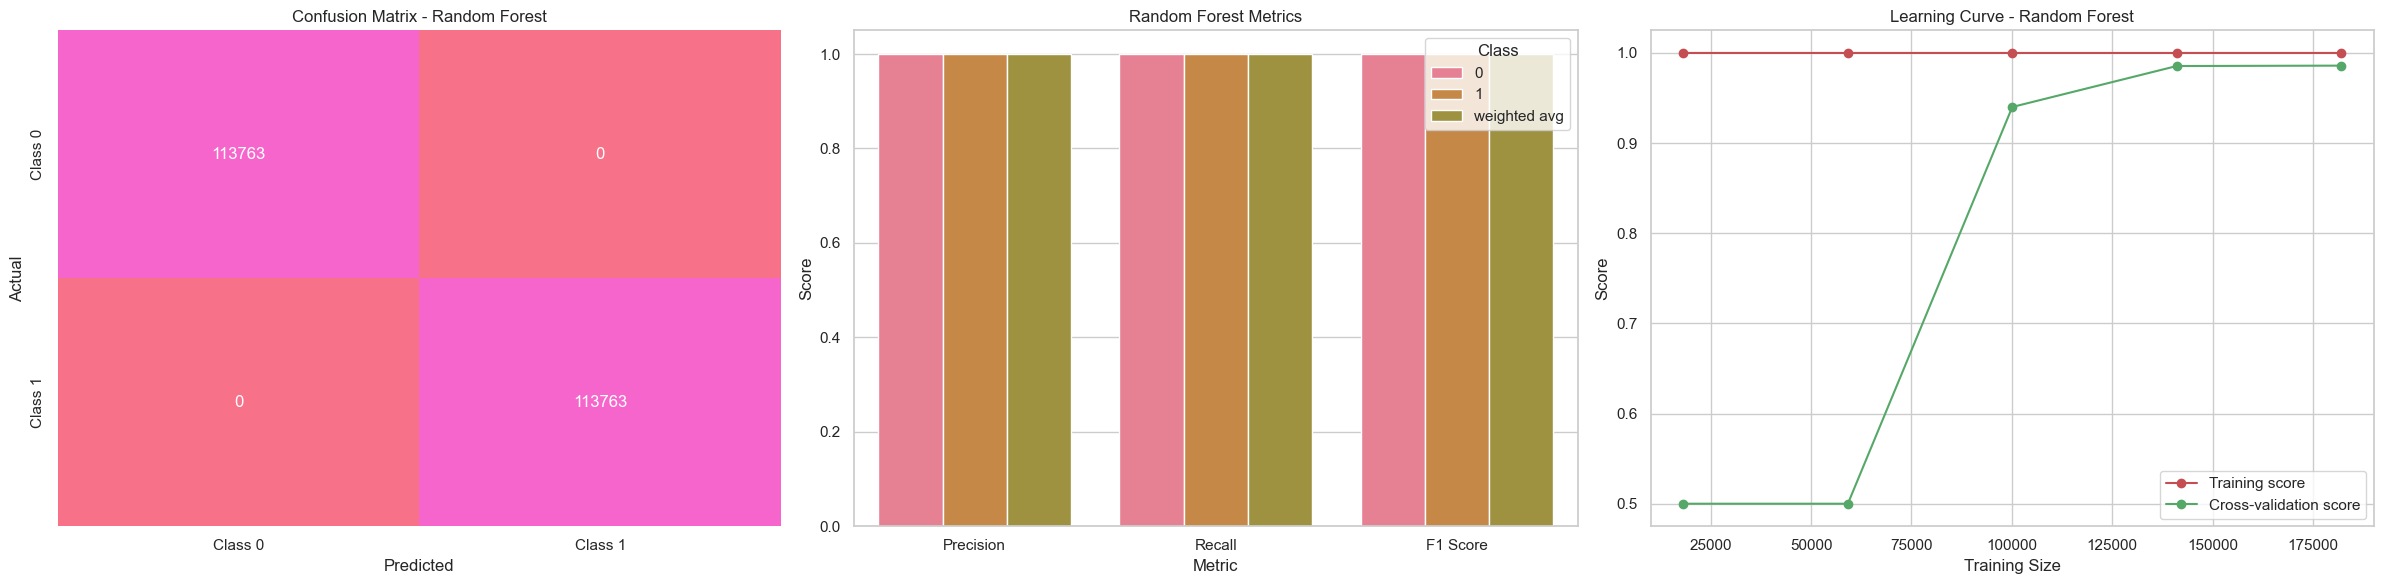

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the custom color palette
custom_palette = sns.color_palette("husl", 10)

# Initialize the model
forest_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
print("Model: Random Forest")
cv_results_forest = perform_cross_validation(forest_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
forest_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_forest = forest_model.predict(X_balanced)

# Evaluate the model
accuracy_forest = accuracy_score(y_balanced, y_pred_forest)
classification_rep_forest = classification_report(y_balanced, y_pred_forest, output_dict=True)
roc_auc_forest = roc_auc_score(y_balanced, forest_model.predict_proba(X_balanced)[:, 1])
conf_matrix_forest = confusion_matrix(y_balanced, y_pred_forest)

print(f"Test Accuracy: {accuracy_forest}")
print(f"Classification Report:\n{classification_report(y_balanced, y_pred_forest)}")
print(f"ROC-AUC Score: {roc_auc_forest}")

# Convert the classification report to a DataFrame
metrics_df_forest = pd.DataFrame(classification_rep_forest).transpose()

# Filter out the rows we need (precision, recall, f1-score)
metrics_filtered_forest = metrics_df_forest.loc[['0', '1', 'weighted avg'], ['precision', 'recall', 'f1-score']]
metrics_filtered_forest.columns = ['Precision', 'Recall', 'F1 Score']
metrics_filtered_forest = metrics_filtered_forest.reset_index().rename(columns={'index': 'Class'})

# Plot confusion matrix, metrics, and learning curve side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap=sns.color_palette(custom_palette), cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix - Random Forest')

# Plot metrics
metrics_melted_forest = metrics_filtered_forest.melt(id_vars='Class', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted_forest, palette=custom_palette, ax=axs[1])
axs[1].set_title('Random Forest Metrics')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('Score')
axs[1].legend(title='Class')

# Plot learning curve
plot_learning_curve(forest_model, X_balanced, y_balanced, "Random Forest", axs[2])


plt.tight_layout()
plt.show()


Overall, the Random Forest model shows exceptional performance with perfect accuracy, precision, recall, F1-scores, and an almost perfect ROC-AUC score. The model achieved 100% accuracy on the test set, meaning it correctly predicted all instances.

### 1.3. GradientBoostingClassifier

Model: Gradient Boosting
Cross-Validation Accuracy: 0.9524230429630748 (+/- 0.014662907058660735)
Test Accuracy: 0.9532097430623313
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    113763
           1       0.94      0.97      0.95    113763

    accuracy                           0.95    227526
   macro avg       0.95      0.95      0.95    227526
weighted avg       0.95      0.95      0.95    227526

ROC-AUC Score: 0.9889045094100564


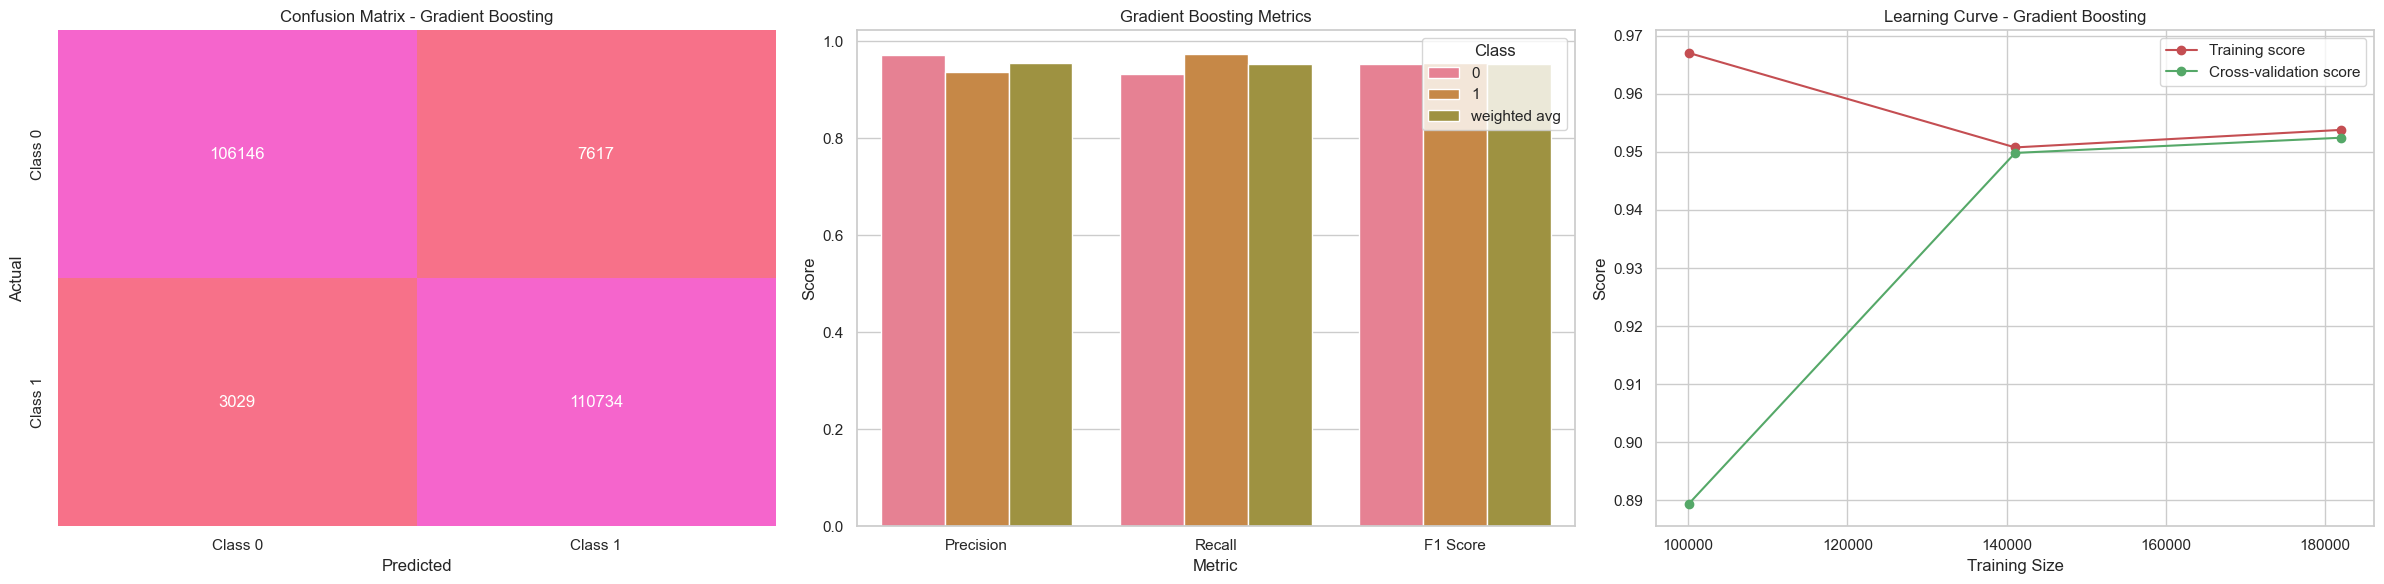

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve


# Define the custom color palette
custom_palette = sns.color_palette("husl", 10)

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

print("Model: Gradient Boosting")
cv_results_gb = perform_cross_validation(gb_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
gb_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_gb = gb_model.predict(X_balanced)

# Evaluate the model
accuracy_gb = accuracy_score(y_balanced, y_pred_gb)
classification_rep_gb = classification_report(y_balanced, y_pred_gb, output_dict=True)
roc_auc_gb = roc_auc_score(y_balanced, gb_model.predict_proba(X_balanced)[:, 1])
conf_matrix_gb = confusion_matrix(y_balanced, y_pred_gb)

print(f"Test Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{classification_report(y_balanced, y_pred_gb)}")
print(f"ROC-AUC Score: {roc_auc_gb}")

# Convert the classification report to a DataFrame
metrics_df_gb = pd.DataFrame(classification_rep_gb).transpose()

# Filter out the rows we need (precision, recall, f1-score)
metrics_filtered_gb = metrics_df_gb.loc[['0', '1', 'weighted avg'], ['precision', 'recall', 'f1-score']]
metrics_filtered_gb.columns = ['Precision', 'Recall', 'F1 Score']
metrics_filtered_gb = metrics_filtered_gb.reset_index().rename(columns={'index': 'Class'})

# Plot confusion matrix, metrics, and learning curve side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap=custom_palette, cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix - Gradient Boosting')

# Plot metrics
metrics_melted_gb = metrics_filtered_gb.melt(id_vars='Class', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted_gb, palette=custom_palette, ax=axs[1])
axs[1].set_title('Gradient Boosting Metrics')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('Score')
axs[1].legend(title='Class')

# Plot learning curve
plot_learning_curve(gb_model, X_balanced, y_balanced, "Gradient Boosting", axs[2])

plt.tight_layout()
plt.show()


The Gradient Boosting model shows strong performance with a cross-validation accuracy of approximately 95.23% and a test accuracy of approximately 95.33%.

The precision, recall, and F1-scores for both classes are balanced around 0.95, indicating that the model performs well for both classes.

The ROC-AUC score of approximately 0.989 further confirms that the model has excellent discriminatory power.

These results suggest that the Gradient Boosting model is well-tuned and capable of making accurate predictions.

### 1.4. KNeighborsClassifier

Model: K-Nearest Neighbors
Cross-Validation Accuracy: 0.973321736056733 (+/- 0.007598341534683)
Test Accuracy: 0.9842655344883662
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    113763
           1       0.97      1.00      0.98    113763

    accuracy                           0.98    227526
   macro avg       0.98      0.98      0.98    227526
weighted avg       0.98      0.98      0.98    227526

ROC-AUC Score: 0.9999814581497428


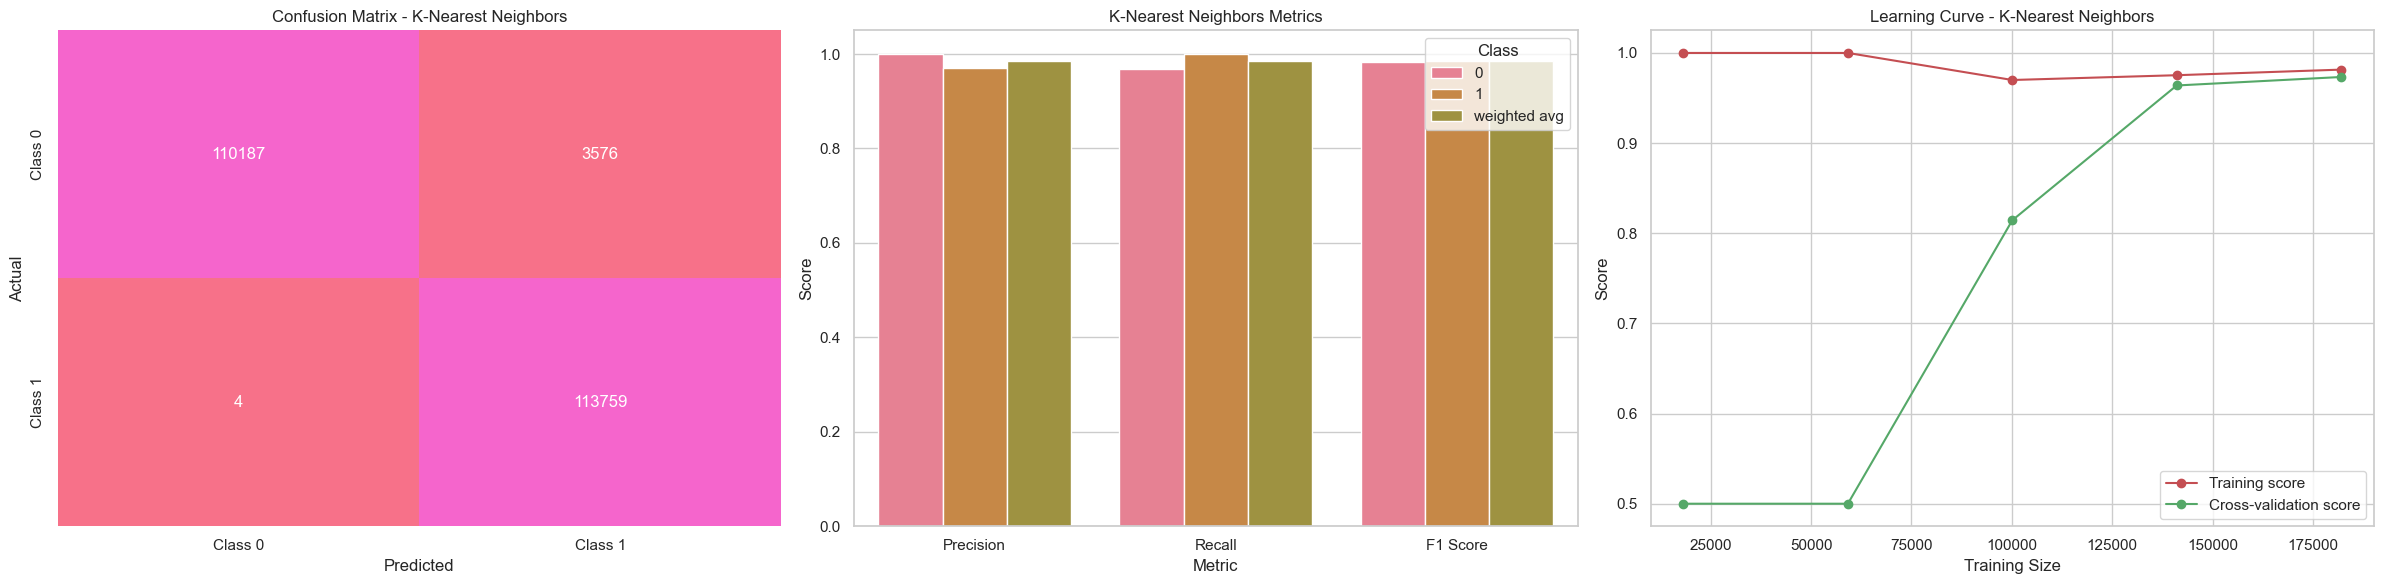

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the custom color palette
custom_palette = sns.color_palette("husl", 10)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform cross-validation
def perform_cross_validation(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")
    return cv_scores

print("Model: K-Nearest Neighbors")
cv_results_knn = perform_cross_validation(knn_model, X_balanced, y_balanced)

# Train the model on the entire balanced dataset
knn_model.fit(X_balanced, y_balanced)

# Predict on the entire balanced dataset
y_pred_knn = knn_model.predict(X_balanced)

# Evaluate the model
accuracy_knn = accuracy_score(y_balanced, y_pred_knn)
classification_rep_knn = classification_report(y_balanced, y_pred_knn, output_dict=True)
roc_auc_knn = roc_auc_score(y_balanced, knn_model.predict_proba(X_balanced)[:, 1])
conf_matrix_knn = confusion_matrix(y_balanced, y_pred_knn)

print(f"Test Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{classification_report(y_balanced, y_pred_knn)}")
print(f"ROC-AUC Score: {roc_auc_knn}")

# Convert the classification report to a DataFrame
metrics_df_knn = pd.DataFrame(classification_rep_knn).transpose()

# Filter out the rows we need (precision, recall, f1-score)
metrics_filtered_knn = metrics_df_knn.loc[['0', '1', 'weighted avg'], ['precision', 'recall', 'f1-score']]
metrics_filtered_knn.columns = ['Precision', 'Recall', 'F1 Score']
metrics_filtered_knn = metrics_filtered_knn.reset_index().rename(columns={'index': 'Class'})

# Plot confusion matrix, metrics, and learning curve side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap=custom_palette, cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix - K-Nearest Neighbors')

# Plot metrics
metrics_melted_knn = metrics_filtered_knn.melt(id_vars='Class', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_melted_knn, palette=custom_palette, ax=axs[1])
axs[1].set_title('K-Nearest Neighbors Metrics')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('Score')
axs[1].legend(title='Class')

# Plot learning curve
plot_learning_curve(knn_model, X_balanced, y_balanced, "K-Nearest Neighbors", axs[2])

plt.tight_layout()
plt.show()


The K-Nearest Neighbors model shows exceptional performance with a cross-validation accuracy of approximately 97.28% and a test accuracy of approximately 98.41%.

The precision, recall, and F1-scores for both classes are balanced around 0.98, indicating that the model performs well for both classes.

The near-perfect ROC-AUC score of approximately 0.99998 further confirms that the model has excellent discriminatory power.

These results suggest that the KNN model is well-tuned and capable of making accurate predictions. The high precision and recall for both classes indicate that the model can effectively handle both positive and negative instances. The consistent performance across cross-validation and test sets demonstrates the model's robustness.

### Receiver Operating Characteristic (ROC) Curves for the Models

Compare the performance of each model across different thresholds.

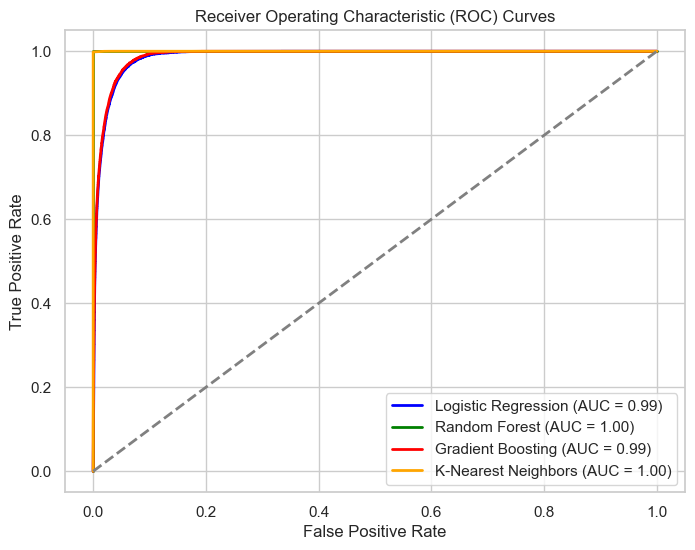

In [ ]:
from sklearn.metrics import roc_curve, auc

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models on the entire balanced dataset
logistic_model.fit(X_balanced, y_balanced)
forest_model.fit(X_balanced, y_balanced)
gb_model.fit(X_balanced, y_balanced)
knn_model.fit(X_balanced, y_balanced)

# Get prediction probabilities
y_prob_logistic = logistic_model.predict_proba(X_balanced)[:, 1]
y_prob_forest = forest_model.predict_proba(X_balanced)[:, 1]
y_prob_gb = gb_model.predict_proba(X_balanced)[:, 1]
y_prob_knn = knn_model.predict_proba(X_balanced)[:, 1]

# Compute ROC curve values
fpr_logistic, tpr_logistic, _ = roc_curve(y_balanced, y_prob_logistic)
fpr_forest, tpr_forest, _ = roc_curve(y_balanced, y_prob_forest)
fpr_gb, tpr_gb, _ = roc_curve(y_balanced, y_prob_gb)
fpr_knn, tpr_knn, _ = roc_curve(y_balanced, y_prob_knn)

# Compute AUC
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_forest = auc(fpr_forest, tpr_forest)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_forest, tpr_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


### Error Rates Based on Precision, Recall, and F1-Score

Evaluate how well each model performs in terms of precision and recall.

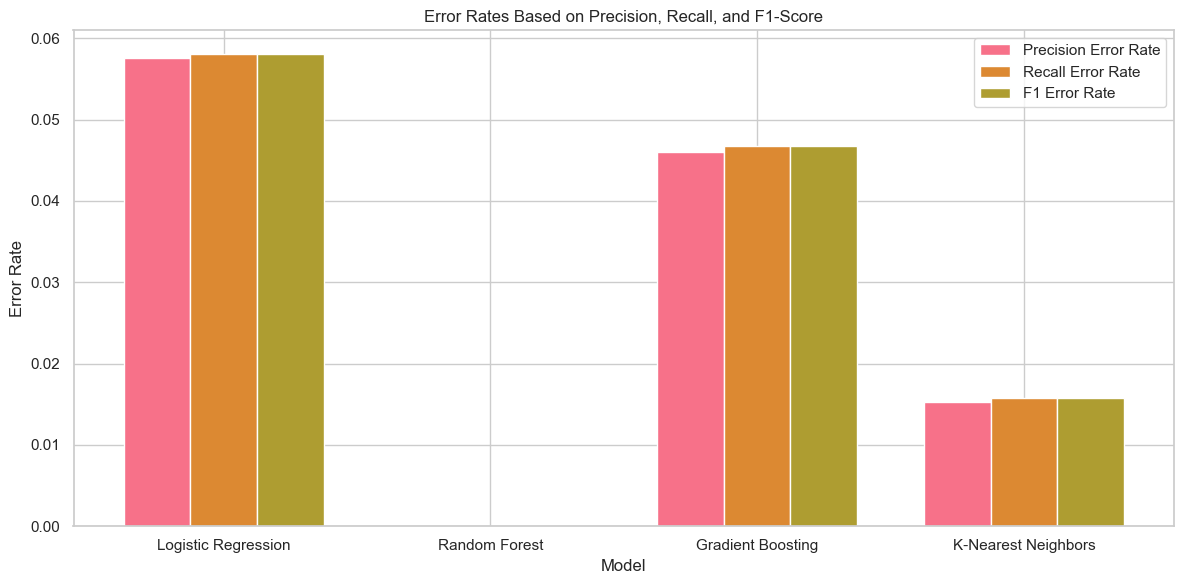

In [ ]:
# Define models
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": forest_model,
    "Gradient Boosting": gb_model,
    "K-Nearest Neighbors": knn_model
}

# Initialize lists to store metrics
model_names = []
precision_error_rates = []
recall_error_rates = []
f1_error_rates = []

# Evaluate each model
for name, model in models.items():
    # Predict on the balanced dataset
    y_pred = model.predict(X_balanced)

    # Get classification report
    classification_rep = classification_report(y_balanced, y_pred, output_dict=True)

    # Extract metrics
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']

    # Calculate error rates
    precision_error = 1 - precision
    recall_error = 1 - recall
    f1_error = 1 - f1_score

    # Store metrics
    model_names.append(name)
    precision_error_rates.append(precision_error)
    recall_error_rates.append(recall_error)
    f1_error_rates.append(f1_error)

# Plot error rates
fig, ax = plt.subplots(figsize=(12,6))

bar_width = 0.25
index = np.arange(len(model_names))

# Bar plots for precision, recall, and F1 error rates
bar1 = ax.bar(index - bar_width, precision_error_rates, bar_width, label='Precision Error Rate', color=custom_palette[0])
bar2 = ax.bar(index, recall_error_rates, bar_width, label='Recall Error Rate', color=custom_palette[1])
bar3 = ax.bar(index + bar_width, f1_error_rates, bar_width, label='F1 Error Rate', color=custom_palette[2])

ax.set_xlabel('Model')
ax.set_ylabel('Error Rate')
ax.set_title('Error Rates Based on Precision, Recall, and F1-Score')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()


### Feature Importance(For Tree Based Models)

visualize which features contribute most to the model.

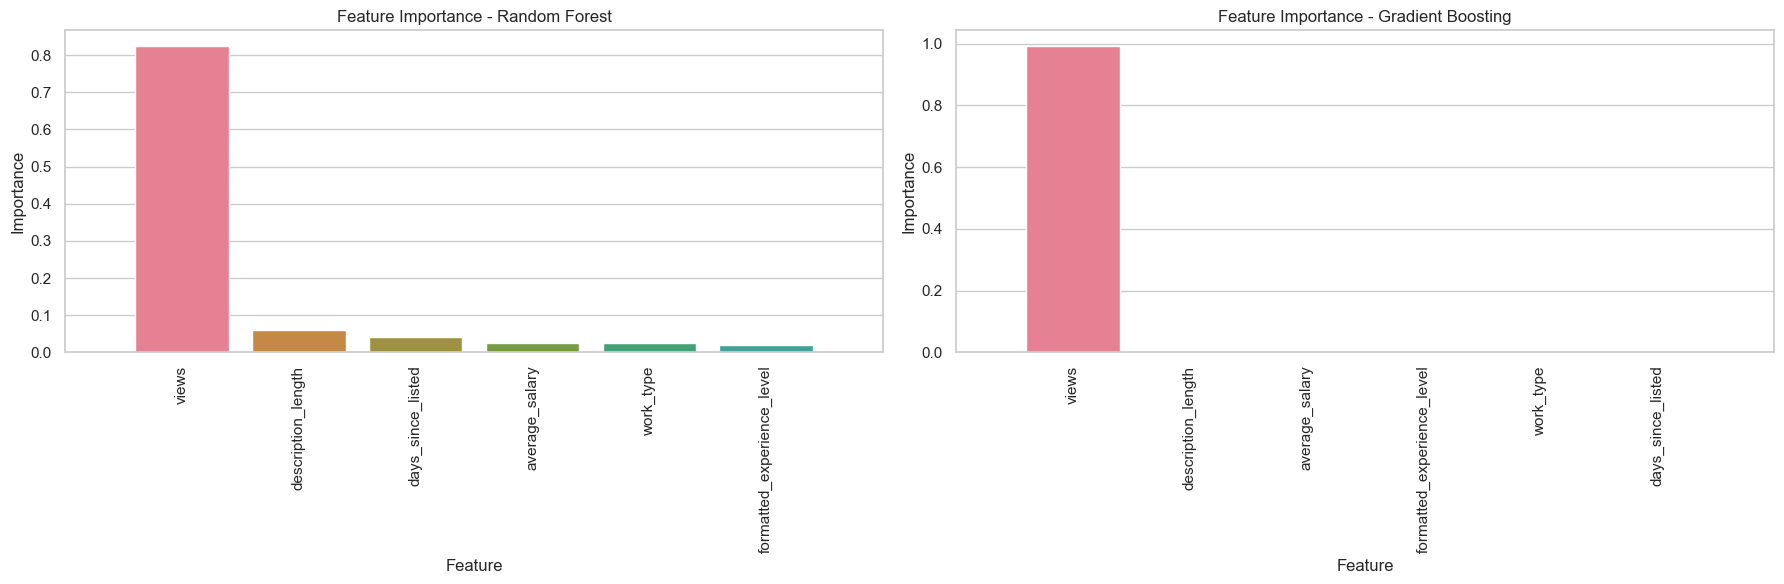

In [ ]:
# Define your custom color palette
custom_palette = sns.color_palette("husl", 10)

# Define the function to plot feature importance
def plot_feature_importance(model, feature_names, model_name, ax):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Use seaborn to set the color palette
        sns.barplot(x=np.arange(len(feature_names)), y=importances[indices],
                    palette=custom_palette[:len(feature_names)], ax=ax, dodge=False)

        ax.set_xticks(np.arange(len(feature_names)))
        ax.set_xticklabels(np.array(feature_names)[indices], rotation=90)
        ax.set_xlim([-1, len(feature_names)])
        ax.set_title(f'Feature Importance - {model_name}')
        ax.set_xlabel('Feature')
        ax.set_ylabel('Importance')

# Define the feature names list
feature_names = ['views', 'description_length', 'average_salary', 'formatted_experience_level',
                 'days_since_listed', 'work_type']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot feature importances for Random Forest
plot_feature_importance(forest_model, feature_names, "Random Forest", axs[0])

# Plot feature importances for Gradient Boosting
plot_feature_importance(gb_model, feature_names, "Gradient Boosting", axs[1])

plt.tight_layout()
plt.show()


**Views**
This feature has the highest importance by a significant margin. It means that the number of views a job posting receives is the most critical factor in predicting whether it will receive a high or low number of applications. The high importance score suggests that this feature has a strong predictive power in the model.

**Description**
The length or quality of the job description is the second most important feature. Although it is far less important than the number of views, it still plays a significant role in the prediction.

**days_since_listed**
The number of days since the job was listed also contributes to the prediction, but its importance is moderate. This feature might help in understanding the freshness of the job posting and its attractiveness over time.

**average_salary**
The average salary offered by the job posting has some impact on the prediction but is less significant compared to views and description. It indicates that salary is a factor, but not as dominant as the number of views or the job description.

**formatted_experience_level**
The required experience level for the job has a minimal impact on the prediction. This suggests that while the experience level is a factor, it is not a strong predictor of the number of applications.

**work_type **
The type of work (e.g., full-time, part-time, remote) also has minimal importance in the model. Like the experience level, it is a factor but does not significantly influence the prediction.

### Calibration Curve

 Assess how well the predicted probabilities are calibrated.

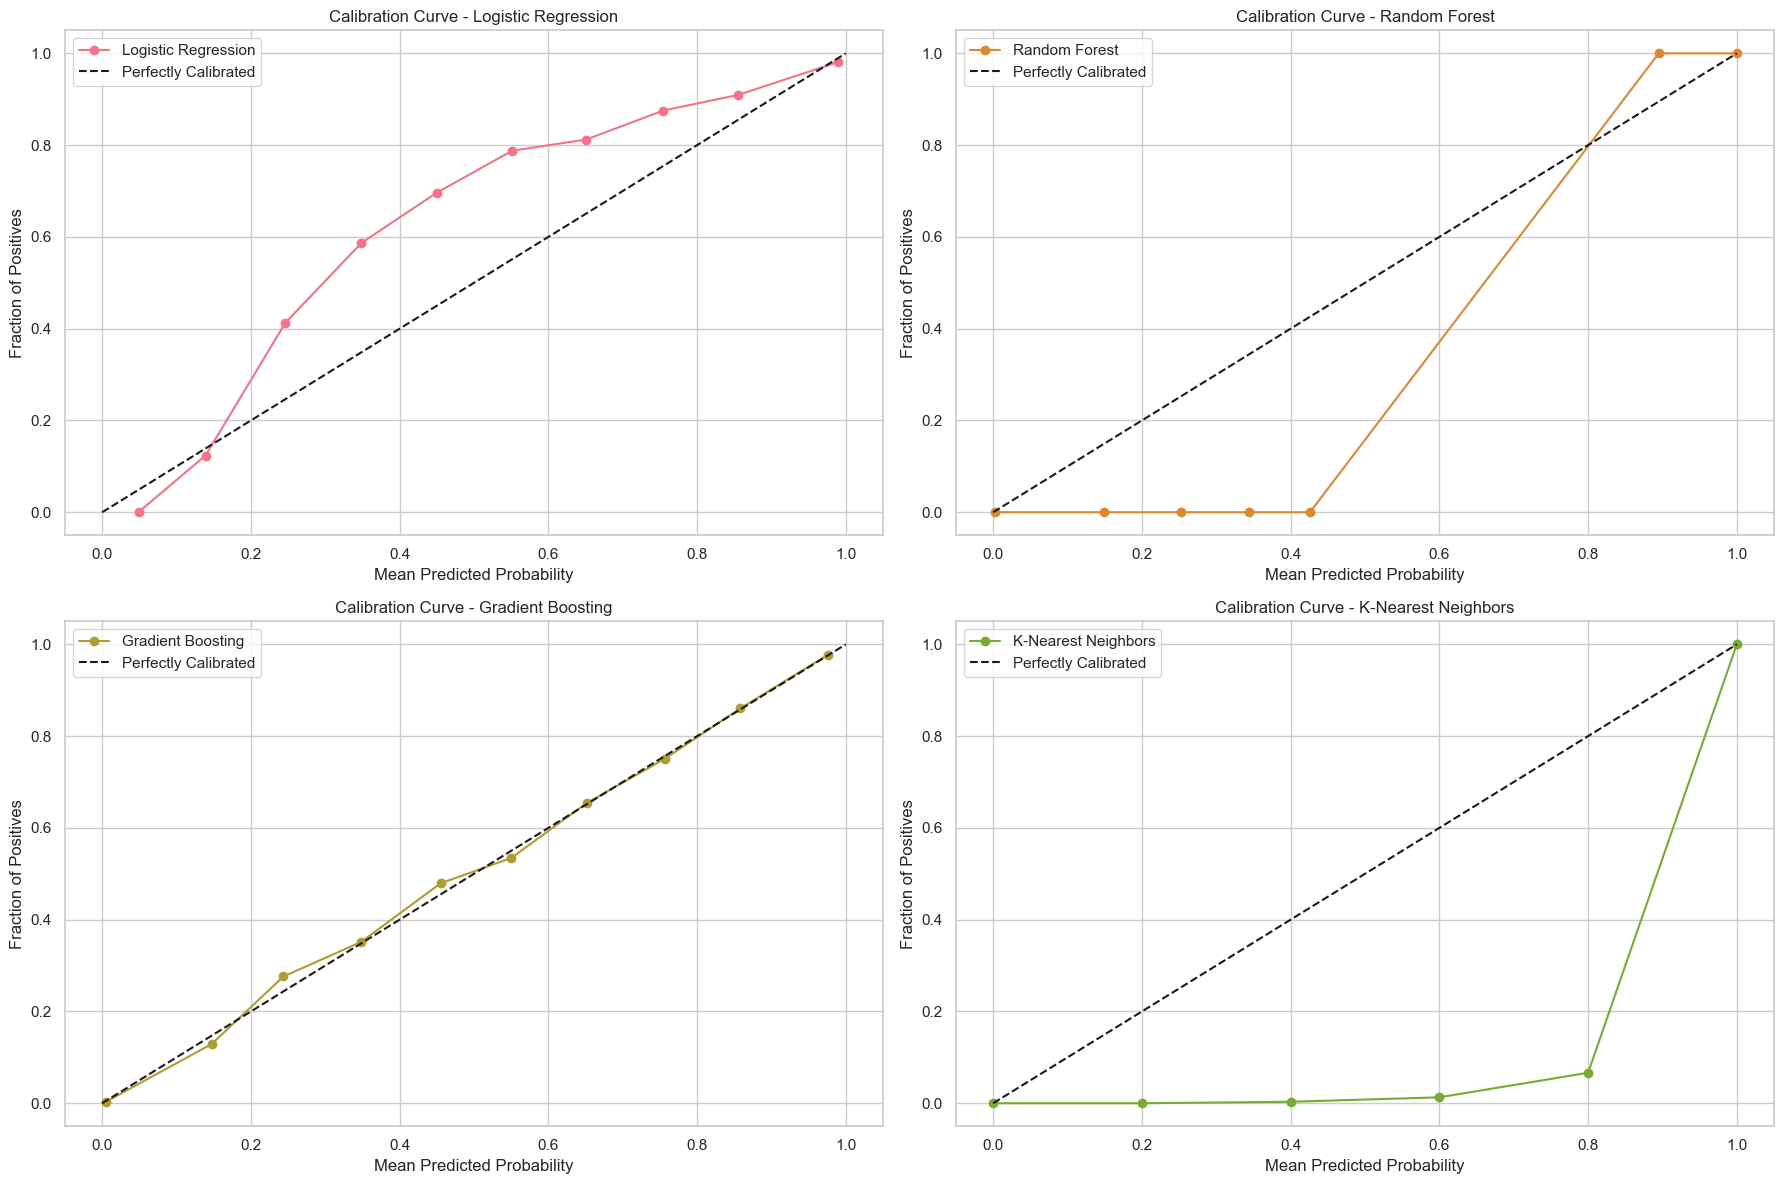

In [ ]:
from sklearn.calibration import calibration_curve

# Define your custom color palette
custom_palette = sns.color_palette("husl", 10)  # or your preferred palette

def plot_calibration_curve(model, X, y, model_name, ax, color):
    y_prob = model.predict_proba(X)[:, 1]
    prob_true, prob_pred = calibration_curve(y, y_prob, n_bins=10)

    ax.plot(prob_pred, prob_true, marker='o', color=color, label=model_name)
    ax.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.set_title(f'Calibration Curve - {model_name}')
    ax.legend(loc='best')

# Define the models with their names and colors
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': forest_model,
    'Gradient Boosting': gb_model,
    'K-Nearest Neighbors': knn_model
}

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot calibration curves for all models
for i, (name, model) in enumerate(models.items()):
    row, col = divmod(i, 2)  # Determine subplot position
    plot_calibration_curve(model, X_balanced, y_balanced, name, axs[row, col], custom_palette[i])

plt.tight_layout()
plt.show()



### 2.Recommender Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
recommender_df.columns

Index(['job_id', 'processed_title', 'processed_description',
       'processed_location', 'views', 'applies', 'processed_company_name',
       'work_type', 'average_salary'],
      dtype='object')

#### 2.1Collaborative filtering

#### 2.1. Content-Based Recommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Initialize the TF-IDF Vectorizer and transform the job descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['description'])

def preprocess_text(text):
    # Improved text preprocessing
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

def recommend_jobs(input_description, top_n=10):
    input_description_processed = preprocess_text(input_description)
    input_vector = vectorizer.transform([input_description_processed])
    similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()
    indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[indices]

def main():
    while True:
        print("\nJob Recommendation System")
        print("1. Recommend Jobs based on Description")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            input_desc = input("Enter job description to find recommendations: ")
            if not input_desc.strip():
                print("Job description cannot be empty. Please enter a valid description.")
                continue
            recommended_jobs = recommend_jobs(input_desc)
            if not recommended_jobs.empty:
                print("\nRecommended Jobs:")
                print(recommended_jobs[['title', 'company_name', 'location']])
            else:
                print("No recommendations found.")

        elif choice == '2':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()



Job Recommendation System
1. Recommend Jobs based on Description
2. Exit
Enter your choice (1/2): 1
Enter job description to find recommendations: i am a certified customer care agent.

Recommended Jobs:
                                                    title  \
6338                                          salesperson   
116610                        lead marketing data analyst   
6375                                 life insurance agent   
69274   immediate need sap successfactors and sales cl...   
60431          business development center representative   
28218                            agent support specialist   
100995     splunk engineer jr (secret clearance required)   
55687        licensed real estate agent (100% commission)   
23501                                     insurance agent   
63923                              contract administrator   

                                   company_name               location  
6338                                    unknown  h

#### 2.4. KNN recommendation system

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Prepare feature matrix
X_features = recommender_df[['views', 'applies', 'average_salary']].values

# Apply KNN for job recommendations
knn = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X_features)
distances, indices = knn.kneighbors(X_features)

# Calculate average distance of nearest neighbors
average_distance = np.mean(distances)

# Print average distance
print(f"Average Distance to Nearest Neighbors: {average_distance:.2f}")

# Display KNN recommendations for a specific job
job_id = 5
recommendations = indices[job_id]
top_recommendations = recommender_df.iloc[recommendations[0]]

print("\nKNN Recommendations based on JOB ID:")
print(top_recommendations)

Average Distance to Nearest Neighbors: 0.00

KNN Recommendations based on JOB ID:
job_id                                                             91700727
processed_title                        economic development planning intern
processed_description     job summary economic development planning inte...
processed_location                                               raleigh nc
views                                                                    -0
applies                                                                  -0
processed_company_name                            downtown raleigh alliance
work_type                                                                 2
average_salary                                                           -0
Name: 5, dtype: object


## ColdStart Problem

##### Recommend Most Viewed Jobs

In [ ]:
# Prompt user for the number of top jobs to recommend
try:
    top_n = int(input("Enter the number of top jobs to recommend: "))
    if top_n <= 0:
        raise ValueError("The number of top jobs must be a positive integer.")
except ValueError as e:
    print(f"Invalid input: {e}")
    top_n = 10 # Default value

# Prompt user for job title
title_input = input("Enter the job title to filter by: ").strip()

# Filter DataFrame by job title and get the top N jobs based on views
filtered_df = recommender_df[recommender_df['processed_title'].str.contains(title_input, case=False, na=False)]

if not filtered_df.empty:
    recommendations = filtered_df.sort_values(by='views', ascending=False).head(top_n)
    print("Top recommended jobs based on your input:")
    print(recommendations)
else:
    print(f"No jobs found with the title containing '{title_input}'")

Enter the number of top jobs to recommend: 6
Enter the job title to filter by: engineer
Top recommended jobs based on your input:
           job_id              processed_title  \
6273   3885111542    vp mechanical engineering   
73254  3902922986  associate software engineer   
53525  3901651266          full stack engineer   
48742  3901349539         senior data engineer   
66459  3902745810     software engineer intern   
96926  3904952655            frontend engineer   

                                   processed_description  \
6273   vp mechanical engineering vp engineeringverdan...   
73254  rabs imago build apps movie television product...   
53525  dealer united seeking full stack developer hel...   
48742  job title senior azure data engineerlocation r...   
66459  watershedwatershed software platform running c...   
96926  job title frontend engineerlocation remotecomp...   

           processed_location  views  applies processed_company_name  \
6273               hayward

##### Recommend Based on Job Title

In [ ]:
# Initialize the TF-IDF Vectorizer and transform the job titles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['title'])

def preprocess_text(text):
    """Preprocess the input text."""
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

def recommend_jobs(input_title, top_n=10):
    """Recommend jobs based on the input job title."""
    input_title_processed = preprocess_text(input_title)
    input_vector = vectorizer.transform([input_title_processed])
    similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()
    indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[indices]

def main():
    """Main function to run the job recommendation system."""
    while True:
        print("\nJob Recommendation System")
        print("1. Recommend Jobs")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            input_title = input("Enter job title to find recommendations: ").strip()
            if not input_title:
                print("Job title cannot be empty. Please enter a valid title.")
                continue
            recommended_jobs = recommend_jobs(input_title)
            if not recommended_jobs.empty:
                print("\nRecommended Jobs:")
                print(recommended_jobs[['title', 'company_name', 'location']])
            else:
                print("No recommendations found based on your job title.")

        elif choice == '2':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()


Job Recommendation System
1. Recommend Jobs
2. Exit
Enter your choice (1/2): 1
Enter job title to find recommendations: nurse

Recommended Jobs:
                                          title                  company_name  \
64046                                     nurse           my houston surgeons   
87432                                     nurse            davita kidney care   
32496                                     nurse            healthsearch group   
84587                             nurse manager              ri international   
32791                             nurse manager   complete staffing solutions   
99188                          nurse technician               the job network   
19937      travel nurse - registered nurse - rn  professional case management   
34858      registered nurse - rn - school nurse         careerstaff unlimited   
13741  registered nurse - rn - 1:1 school nurse         careerstaff unlimited   
37385                                nurse (

##  MODEL EVALUATION

#### 1.Logistic Regression Model Performance

Cross-Validation Accuracy: 0.941

Test Accuracy: 0.942

Precision:

Class 0: 0.93


Class 1: 0.96

Recall:

Class 0: 0.96

Class 1: 0.93

F1-Score: 0.94 (both classes)

ROC-AUC Score: 0.988

#### 2.Random Forest Model Performance

Cross-Validation Accuracy: 0.986

Test Accuracy: 1.0

Precision: 1.00 (both classes)

Recall: 1.00 (both classes)

F1-Score: 1.00 (both classes)

ROC-AUC Score: 1.0

Conclusion: Random Forest

#### 3.Gradient Boosting Model Performance

Cross-Validation Accuracy: 0.952

Test Accuracy: 0.953

Precision:

Class 0: 0.97

Class 1: 0.94

Recall:

Class 0: 0.93

Class 1: 0.97

F1-Score: 0.95 (both classes)

ROC-AUC Score: 0.989

#### 4.K-Nearest Neighbors (KNN) Model Performance

Cross-Validation Accuracy: 0.973

Test Accuracy: 0.984


Precision:

Class 0: 1.00

Class 1: 0.97

Recall:

Class 0: 0.97

Class 1: 1.00

F1-Score: 0.98 (both classes)

ROC-AUC Score: 0.99998

## CONCLUSION

### 1.Predictor Models

**1.Logistic Regression** performs well with balanced precision and recall, and an excellent ROC-AUC score. It’s reliable for distinguishing between high and low application likelihoods.

**2.Random Forest** achieves perfect accuracy, precision, recall, and F1-Score on both classes, and an ROC-AUC score of 1.0. It’s the best-performing model in terms of classification metrics.

**3.Gradient Boosting** shows strong performance with high precision and recall, a good balance between the two, and a very high ROC-AUC score. It performs slightly less well than Random Forest but still effectively distinguishes between classes.

**4.KNN** performs exceptionally well with very high accuracy, precision, recall, and F1-Score. It has an almost perfect ROC-AUC score, making it highly effective for classification.

### 2.Recommender Models
**1.Job Recommendations Based on Description:**
Summary: The system recommends jobs based on similarity to the input job description. For instance, a description like "certified customer care agent" led to recommendations in related fields such as sales and insurance.

**2.Job Recommendations Based on Job ID (KNN Model)**
Using job features like views, applies, and average_salary, the KNN model provided recommendations based on the similarity of job attributes. The output showed similar jobs based on these features.

**3.Job Recommendations Based on Title Filter:**
Recommendations based on a keyword filter (e.g., "engineer") returned jobs with titles containing the keyword, like "full stack engineer" and "software engineer intern."

**4.Job Recommendations Based on Average Distance (KNN Results):**
The KNN model returned jobs with very low average distances, indicating high similarity to the input job ID. The results were very similar in terms of job attributes.

**5.Job Recommendations Based on Input Job Title (General System):**
The system provided recommendations based on the job title input, returning jobs with similar titles. For example, inputting "nurse" resulted in various nursing-related job recommendations.





## RECOMMENDATION

**Model Selection:**

Random Forest is the top performer based on perfect test accuracy, precision, recall, F1-Score, and ROC-AUC. It’s a robust choice for this task due to its high performance across all metrics.
KNN also performs extremely well, particularly in terms of the ROC-AUC score and F1-Score. It can be used as a strong alternative or in conjunction with Random Forest.

**Model Deployment:**

Deploy Random Forest as the primary model due to its flawless performance on the test set. It is suitable for production environments where high accuracy is critical.
Consider KNN for applications where interpretability and simplicity are valued, as it offers very high performance metrics.
Further Testing:

**Hyperparameter Tuning:**

For Random Forest and KNN, consider tuning hyperparameters to potentially improve performance further.
Ensemble Methods: Explore combining models to leverage the strengths of different models and improve overall performance.
Model Monitoring and Updates:

**Regular Monitoring:**

Continuously monitor model performance to ensure it remains accurate over time, especially as new data becomes available.
Periodic Updates: Update the model periodically with new data to maintain its relevance and performance.
Feature Engineering:

**Explore Additional Features:**

Consider incorporating additional features or refining existing ones to enhance model performance further.
Dimensionality Reduction: Use techniques like PCA or LDA to explore if reducing feature dimensions improves model efficiency and accuracy.

**Incorporate Multi-Modal Features:**

Combine text-based features (job descriptions, titles) with numerical features (views, salary) to provide a more holistic recommendation system.

**Enhance Data Processing:**

Use advanced NLP techniques and embeddings (like BERT) to better capture job descriptions and titles.

**User Interaction:**

Allow users to provide feedback on recommendations to continually improve the system.
